# good resource for food price prediction models: https://www.ers.usda.gov/webdocs/publications/47309/51572_tb1883.pdf?v=42079

start

In [1]:
import pandas as pd

In [2]:
food_bev=pd.read_csv("food_bev.csv")

In [3]:
food_bev

,series_id,year,period,value,footnote_codes
0,CUSR0000SAF,1967,M01,34.800,NaN
1,CUSR0000SAF,1967,M02,34.700,NaN
2,CUSR0000SAF,1967,M03,34.700,NaN
3,CUSR0000SAF,1967,M04,34.600,NaN
4,CUSR0000SAF,1967,M05,34.600,NaN
...,...,...,...,...,...
148853,CUUSS000SEFV,2022,S02,295.014,NaN
148854,CUUSS000SEFV,2022,S03,288.777,NaN
148855,CUUSS000SEFV,2023,S01,305.524,NaN
148856,CUUSS000SEFV,2023,S02,312.508,NaN


In [4]:
food_bev = food_bev.iloc[:, 1:-1]

In [5]:
food_bev

,year,period,value
0,1967,M01,34.800
1,1967,M02,34.700
2,1967,M03,34.700
3,1967,M04,34.600
4,1967,M05,34.600
...,...,...,...
148853,2022,S02,295.014
148854,2022,S03,288.777
148855,2023,S01,305.524
148856,2023,S02,312.508


In [6]:
# Find the index of the first occurrence of 2024 in the 'year' column
first_2024_index = food_bev.index[food_bev['year'] == 2024].min()

# Slice the DataFrame up to the index of the first occurrence of 2024
food_bev = food_bev.loc[:first_2024_index]

In [7]:
food_bev

,year,period,value
0,1967,M01,34.800
1,1967,M02,34.700
2,1967,M03,34.700
3,1967,M04,34.600
4,1967,M05,34.600
...,...,...,...
680,2023,M09,321.918
681,2023,M10,322.872
682,2023,M11,323.376
683,2023,M12,324.029


In [8]:
food_bev = food_bev.rename(columns={'year': 'Year', 'period': 'Month'})

In [9]:
food_bev

,Year,Month,value
0,1967,M01,34.800
1,1967,M02,34.700
2,1967,M03,34.700
3,1967,M04,34.600
4,1967,M05,34.600
...,...,...,...
680,2023,M09,321.918
681,2023,M10,322.872
682,2023,M11,323.376
683,2023,M12,324.029


In [10]:
food_bev['Month'] = food_bev['Month'].str.replace('M', '').astype(int)

In [11]:
food_bev

,Year,Month,value
0,1967,1,34.800
1,1967,2,34.700
2,1967,3,34.700
3,1967,4,34.600
4,1967,5,34.600
...,...,...,...
680,2023,9,321.918
681,2023,10,322.872
682,2023,11,323.376
683,2023,12,324.029


In [12]:
PLN=pd.read_csv("PLN_TO_ITM_WK (KNA_COMRCL)_PLN_TO_ITM_WK.csv")

In [13]:
PLN

,All In Flg,Alt Segment,BU,Cal Wk,Can Catg,Catg,Curr,Fisc Yr,Lvl A,Lvl B,...,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Pln Ship Usd,Sugstd Base Vol Sas,Sugstd Shlf Prc Sas,Totl Pln Kmf Cost Of Prod Usd
0,F,PWS,K1,202301,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,PWS,K1,202302,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,PWS,K1,202303,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,PWS,K1,202304,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,PWS,K1,202305,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,F,CONVENIENCE,Specialty,202017,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325644,F,CONVENIENCE,Specialty,202018,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325645,F,CONVENIENCE,Specialty,202019,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325646,F,CONVENIENCE,Specialty,202020,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pop_tarts = PLN[PLN['Prod Hier Brand Desc'] == 'Pop-Tarts'].copy()

In [15]:
pop_tarts

,All In Flg,Alt Segment,BU,Cal Wk,Can Catg,Catg,Curr,Fisc Yr,Lvl A,Lvl B,...,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Pln Ship Usd,Sugstd Base Vol Sas,Sugstd Shlf Prc Sas,Totl Pln Kmf Cost Of Prod Usd
0,F,PWS,K1,202301,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,PWS,K1,202302,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,PWS,K1,202303,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,PWS,K1,202304,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,PWS,K1,202305,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,F,CONVENIENCE,Specialty,202017,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325644,F,CONVENIENCE,Specialty,202018,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325645,F,CONVENIENCE,Specialty,202019,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325646,F,CONVENIENCE,Specialty,202020,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:

pop_tarts=pop_tarts[["Yr & Wk", "Pln Ship Usd", "Actl Ship Usd"]]

In [17]:
pop_tarts

,Yr & Wk,Pln Ship Usd,Actl Ship Usd
0,2023&1,0.0,0.00
1,2023&2,0.0,0.00
2,2023&3,0.0,0.00
3,2023&4,0.0,0.00
4,2023&5,0.0,0.00
...,...,...,...
1325643,2020&17,0.0,1252.80
1325644,2020&18,0.0,1252.80
1325645,2020&19,0.0,99.72
1325646,2020&20,0.0,626.40


In [18]:

pop_tarts_filtered = pop_tarts[(pop_tarts['Pln Ship Usd'] != 0) | (pop_tarts['Actl Ship Usd'] != 0)].copy()

In [19]:
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd
8,2023&9,2336.16,0.00
9,2023&10,2455.20,0.00
10,2023&11,2455.20,0.00
11,2023&12,2455.20,0.00
12,2023&13,2455.20,0.00
...,...,...,...
1325643,2020&17,0.00,1252.80
1325644,2020&18,0.00,1252.80
1325645,2020&19,0.00,99.72
1325646,2020&20,0.00,626.40


In [20]:

pop_tarts_filtered = pop_tarts_filtered[pop_tarts_filtered['Actl Ship Usd'] != 0.00].copy()

In [21]:
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd
13,2023&14,2049.3,2856.00
14,2023&15,2049.3,8772.00
17,2023&18,2049.3,1428.00
18,2023&19,2049.3,2244.00
19,2023&20,2049.3,408.00
...,...,...,...
1325643,2020&17,0.0,1252.80
1325644,2020&18,0.0,1252.80
1325645,2020&19,0.0,99.72
1325646,2020&20,0.0,626.40


In [22]:

pop_tarts_filtered = pop_tarts_filtered[pop_tarts_filtered['Pln Ship Usd'] != 0.00].copy()

In [23]:
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd
13,2023&14,2049.30,2856.00
14,2023&15,2049.30,8772.00
17,2023&18,2049.30,1428.00
18,2023&19,2049.30,2244.00
19,2023&20,2049.30,408.00
...,...,...,...
1325410,2023&41,676.44,95.84
1325412,2023&43,293.03,431.28
1325413,2023&44,676.44,47.92
1325414,2023&45,676.39,47.92


In [24]:
usa_inf=pd.read_csv("USACPIALLMINMEI.csv")

In [25]:
usa_inf

,DATE,USACPIALLMINMEI
0,1960-01-01,12.361982
1,1960-02-01,12.404174
2,1960-03-01,12.404174
3,1960-04-01,12.446365
4,1960-05-01,12.446365
...,...,...
737,2021-06-01,114.631440
738,2021-07-01,115.182877
739,2021-08-01,115.420835
740,2021-09-01,115.734314


In [26]:
# Convert the 'DATE' column to datetime format
usa_inf['DATE'] = pd.to_datetime(usa_inf['DATE'])

# Create a new column with the desired format (year&week)
usa_inf['YearWeek'] = usa_inf['DATE'].dt.strftime('%Y&%U')

# Display the updated DataFrame
print(usa_inf)


          DATE  USACPIALLMINMEI YearWeek
0   1960-01-01        12.361982  1960&00
1   1960-02-01        12.404174  1960&05
2   1960-03-01        12.404174  1960&09
3   1960-04-01        12.446365  1960&13
4   1960-05-01        12.446365  1960&18
..         ...              ...      ...
737 2021-06-01       114.631440  2021&22
738 2021-07-01       115.182877  2021&26
739 2021-08-01       115.420835  2021&31
740 2021-09-01       115.734314  2021&35
741 2021-10-01       116.695849  2021&39

[742 rows x 3 columns]


In [27]:
import pandas as pd

# Read the CSV file
usa_inf = pd.read_csv("USACPIALLMINMEI.csv")

# Convert the 'DATE' column to datetime format
usa_inf['DATE'] = pd.to_datetime(usa_inf['DATE'])

# Create a new column with the desired format (year&week)
usa_inf['YearWeek'] = usa_inf['DATE'].dt.strftime('%Y&%U')

# Create a sequence of all weeks
all_weeks = pd.date_range(start=usa_inf['DATE'].min(), end=usa_inf['DATE'].max(), freq='W-MON').strftime('%Y&%U')

# Merge the existing DataFrame with the sequence of all weeks
usa_inf = pd.merge(pd.DataFrame(all_weeks, columns=['YearWeek']), usa_inf, how='left', on='YearWeek')

# Fill missing values with the previous value
usa_inf['USACPIALLMINMEI'] = usa_inf['USACPIALLMINMEI'].fillna(method='ffill')

# Display the updated DataFrame
print(usa_inf)


     YearWeek       DATE  USACPIALLMINMEI
0     1960&01        NaT              NaN
1     1960&02        NaT              NaN
2     1960&03        NaT              NaN
3     1960&04        NaT              NaN
4     1960&05 1960-02-01        12.404174
...       ...        ...              ...
3217  2021&35 2021-09-01       115.734314
3218  2021&36        NaT       115.734314
3219  2021&37        NaT       115.734314
3220  2021&38        NaT       115.734314
3221  2021&39 2021-10-01       116.695849

[3222 rows x 3 columns]


In [28]:
usa_inf

,YearWeek,DATE,USACPIALLMINMEI
0,1960&01,NaT,NaN
1,1960&02,NaT,NaN
2,1960&03,NaT,NaN
3,1960&04,NaT,NaN
4,1960&05,1960-02-01,12.404174
...,...,...,...
3217,2021&35,2021-09-01,115.734314
3218,2021&36,NaT,115.734314
3219,2021&37,NaT,115.734314
3220,2021&38,NaT,115.734314


In [29]:
nan_count = usa_inf['USACPIALLMINMEI'].isna().sum()

print("Number of NaN values in 'USACPIALLMINMEI' column:", nan_count)

Number of NaN values in 'USACPIALLMINMEI' column: 4


In [30]:
usa_inf = usa_inf.iloc[4:]
usa_inf.reset_index(drop=True, inplace=True)

In [31]:
usa_inf

,YearWeek,DATE,USACPIALLMINMEI
0,1960&05,1960-02-01,12.404174
1,1960&06,NaT,12.404174
2,1960&07,NaT,12.404174
3,1960&08,NaT,12.404174
4,1960&09,1960-03-01,12.404174
...,...,...,...
3213,2021&35,2021-09-01,115.734314
3214,2021&36,NaT,115.734314
3215,2021&37,NaT,115.734314
3216,2021&38,NaT,115.734314


In [32]:
usa_inf = usa_inf.drop('DATE', axis=1)

In [33]:
usa_inf

,YearWeek,USACPIALLMINMEI
0,1960&05,12.404174
1,1960&06,12.404174
2,1960&07,12.404174
3,1960&08,12.404174
4,1960&09,12.404174
...,...,...
3213,2021&35,115.734314
3214,2021&36,115.734314
3215,2021&37,115.734314
3216,2021&38,115.734314


In [34]:
usa_inf = usa_inf.rename(columns={'USACPIALLMINMEI': 'inflation'})
usa_inf

,YearWeek,inflation
0,1960&05,12.404174
1,1960&06,12.404174
2,1960&07,12.404174
3,1960&08,12.404174
4,1960&09,12.404174
...,...,...
3213,2021&35,115.734314
3214,2021&36,115.734314
3215,2021&37,115.734314
3216,2021&38,115.734314


In [35]:
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd
13,2023&14,2049.30,2856.00
14,2023&15,2049.30,8772.00
17,2023&18,2049.30,1428.00
18,2023&19,2049.30,2244.00
19,2023&20,2049.30,408.00
...,...,...,...
1325410,2023&41,676.44,95.84
1325412,2023&43,293.03,431.28
1325413,2023&44,676.44,47.92
1325414,2023&45,676.39,47.92


In [36]:
import pandas as pd

# Assuming you have usa_inf and pop_tarts_filtered DataFrames

# Merge DataFrames based on the 'Yr & Wk' column
merged_df = pd.merge(pop_tarts_filtered, usa_inf, how='left', left_on='Yr & Wk', right_on='YearWeek')

# Display the merged DataFrame
print(merged_df)


        Yr & Wk  Pln Ship Usd  Actl Ship Usd YearWeek  inflation
0       2023&14       2049.30        2856.00      NaN        NaN
1       2023&15       2049.30        8772.00      NaN        NaN
2       2023&18       2049.30        1428.00      NaN        NaN
3       2023&19       2049.30        2244.00      NaN        NaN
4       2023&20       2049.30         408.00      NaN        NaN
...         ...           ...            ...      ...        ...
236107  2023&41        676.44          95.84      NaN        NaN
236108  2023&43        293.03         431.28      NaN        NaN
236109  2023&44        676.44          47.92      NaN        NaN
236110  2023&45        676.39          47.92      NaN        NaN
236111  2023&47        293.08        2689.28      NaN        NaN

[236112 rows x 5 columns]


In [37]:
merged_df

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,YearWeek,inflation
0,2023&14,2049.30,2856.00,NaN,NaN
1,2023&15,2049.30,8772.00,NaN,NaN
2,2023&18,2049.30,1428.00,NaN,NaN
3,2023&19,2049.30,2244.00,NaN,NaN
4,2023&20,2049.30,408.00,NaN,NaN
...,...,...,...,...,...
236107,2023&41,676.44,95.84,NaN,NaN
236108,2023&43,293.03,431.28,NaN,NaN
236109,2023&44,676.44,47.92,NaN,NaN
236110,2023&45,676.39,47.92,NaN,NaN


In [38]:
no_nan_df = merged_df.dropna()

In [39]:
no_nan_df

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,YearWeek,inflation
147,2020&10,166.63,619.20,2020&10,108.901471
148,2020&11,166.63,9288.00,2020&11,108.901471
149,2020&16,160.84,3715.20,2020&16,108.173253
150,2020&19,176.04,3715.20,2020&19,108.175363
151,2020&21,176.01,3715.20,2020&21,108.175363
...,...,...,...,...,...
235798,2021&30,28.44,-341.28,2021&30,115.182877
235799,2021&31,28.44,-113.76,2021&31,115.420835
235800,2021&32,28.44,-426.60,2021&32,115.420835
235801,2021&33,28.44,-85.32,2021&33,115.420835


In [40]:
import pandas as pd

# Assuming you have no_nan_df from the previous example

# Split 'Yr & Wk' into 'Year' and 'Week' columns
no_nan_df[['Year', 'Week']] = no_nan_df['Yr & Wk'].str.split('&', expand=True)

no_nan_df[['Year', 'Week']] = no_nan_df[['Year', 'Week']].apply(pd.to_numeric)

sorted_df = no_nan_df.sort_values(by=['Year', 'Week'], ascending=[False, False])
print(sorted_df)

        Yr & Wk  Pln Ship Usd  Actl Ship Usd YearWeek   inflation  Year  Week
166     2021&39       1797.44         1706.4  2021&39  116.695849  2021    39
319     2021&39       1021.54         1555.2  2021&39  116.695849  2021    39
468     2021&39       1136.89         3412.8  2021&39  116.695849  2021    39
562     2021&39       1517.93         3412.8  2021&39  116.695849  2021    39
578     2021&39        454.20          247.8  2021&39  116.695849  2021    39
...         ...           ...            ...      ...         ...   ...   ...
233864  2020&10        575.13         8667.0  2020&10  108.901471  2020    10
234171  2020&10       1305.99         5940.0  2020&10  108.901471  2020    10
234350  2020&10       1284.01         -172.8  2020&10  108.901471  2020    10
234494  2020&10         38.12          108.0  2020&10  108.901471  2020    10
235443  2020&10         13.15          432.0  2020&10  108.901471  2020    10

[88084 rows x 7 columns]


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [41]:
sorted_df

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,YearWeek,inflation,Year,Week
166,2021&39,1797.44,1706.4,2021&39,116.695849,2021,39
319,2021&39,1021.54,1555.2,2021&39,116.695849,2021,39
468,2021&39,1136.89,3412.8,2021&39,116.695849,2021,39
562,2021&39,1517.93,3412.8,2021&39,116.695849,2021,39
578,2021&39,454.20,247.8,2021&39,116.695849,2021,39
...,...,...,...,...,...,...,...
233864,2020&10,575.13,8667.0,2020&10,108.901471,2020,10
234171,2020&10,1305.99,5940.0,2020&10,108.901471,2020,10
234350,2020&10,1284.01,-172.8,2020&10,108.901471,2020,10
234494,2020&10,38.12,108.0,2020&10,108.901471,2020,10


In [42]:
sorted_df = sorted_df.drop(columns=['Yr & Wk', 'YearWeek'])

In [43]:
sorted_df

,Pln Ship Usd,Actl Ship Usd,inflation,Year,Week
166,1797.44,1706.4,116.695849,2021,39
319,1021.54,1555.2,116.695849,2021,39
468,1136.89,3412.8,116.695849,2021,39
562,1517.93,3412.8,116.695849,2021,39
578,454.20,247.8,116.695849,2021,39
...,...,...,...,...,...
233864,575.13,8667.0,108.901471,2020,10
234171,1305.99,5940.0,108.901471,2020,10
234350,1284.01,-172.8,108.901471,2020,10
234494,38.12,108.0,108.901471,2020,10


In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

sorted_df['Date'] = pd.to_datetime(sorted_df['Year'].astype(str) + sorted_df['Week'].astype(str) + '1', format='%Y%W%w')

#Sort DataFrame by date
sorted_df = sorted_df.sort_values(by='Date')

#Extract relevant columns for modeling
X = sorted_df[['Pln Ship Usd', 'inflation']]
y = sorted_df['Actl Ship Usd']

#Split the data into training (90%) and testing (10%) sets
train_size = int(len(sorted_df) * 0.9)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

#Reset index for the training and testing sets
train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)
test_y = test_y.reset_index(drop=True)

#Normalize
scaler_X = StandardScaler().fit(train_X)
scaler_y = StandardScaler().fit(np.array(train_y).reshape(-1, 1))

train_X_scaled = scaler_X.transform(train_X)
train_y_scaled = scaler_y.transform(np.array(train_y).reshape(-1, 1))

test_X_scaled = scaler_X.transform(test_X)
test_y_scaled = scaler_y.transform(np.array(test_y).reshape(-1, 1))

#Reshape data for LSTM input shape (samples, time steps, features)
train_X_reshaped = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

#Build the time series neural network model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model and capture the training history
history = model.fit(train_X_reshaped, train_y_scaled, epochs=5, batch_size=32, validation_split=0.1)

# Access the training loss from history
training_loss = history.history['loss']

Epoch 1/5
2230/2230 [==============================] - 3s 1ms/step - loss: 0.4749 - val_loss: 0.4016
Epoch 2/5
2230/2230 [==============================] - 2s 1ms/step - loss: 0.3345 - val_loss: 0.3246
Epoch 3/5
2230/2230 [==============================] - 2s 1ms/step - loss: 0.3287 - val_loss: 0.3033
Epoch 4/5
2230/2230 [==============================] - 2s 1ms/step - loss: 0.3216 - val_loss: 0.3007
Epoch 5/5
2230/2230 [==============================] - 2s 1ms/step - loss: 0.3195 - val_loss: 0.2941


In [104]:
sorted_df

,Pln Ship Usd,Actl Ship Usd,inflation,Year,Week,Date
235443,13.15,432.0,108.901471,2020,10,2020-03-09
234350,1284.01,-172.8,108.901471,2020,10,2020-03-09
234171,1305.99,5940.0,108.901471,2020,10,2020-03-09
233864,575.13,8667.0,108.901471,2020,10,2020-03-09
233676,3915.96,9331.2,108.901471,2020,10,2020-03-09
...,...,...,...,...,...,...
2800,2413.48,9100.8,116.695849,2021,39,2021-09-27
901,616.10,3412.8,116.695849,2021,39,2021-09-27
728,755.79,4550.4,116.695849,2021,39,2021-09-27
562,1517.93,3412.8,116.695849,2021,39,2021-09-27


In [105]:
test_y

0       4449.60
1       2275.20
2       2224.80
3       1296.00
4       -556.92
         ...   
8804    9100.80
8805    3412.80
8806    4550.40
8807    3412.80
8808    1706.40
Name: Actl Ship Usd, Length: 8809, dtype: float64

In [106]:
test_X

,Pln Ship Usd,inflation
0,4968.72,115.420835
1,13179.84,115.420835
2,5450.76,115.420835
3,4944.25,115.420835
4,358.33,115.420835
...,...,...
8804,2413.48,116.695849
8805,616.10,116.695849
8806,755.79,116.695849
8807,1517.93,116.695849


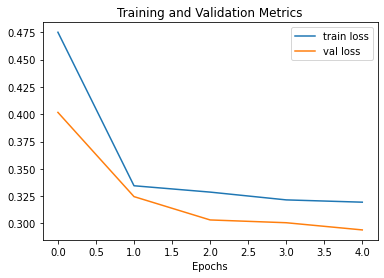

In [107]:
import matplotlib.pyplot as plt
# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

plt.legend()
plt.xlabel('Epochs')
plt.title('Training and Validation Metrics')
plt.savefig('Training_Validation_Metrics.png')
plt.show()

In [108]:
sorted_df

,Pln Ship Usd,Actl Ship Usd,inflation,Year,Week,Date
235443,13.15,432.0,108.901471,2020,10,2020-03-09
234350,1284.01,-172.8,108.901471,2020,10,2020-03-09
234171,1305.99,5940.0,108.901471,2020,10,2020-03-09
233864,575.13,8667.0,108.901471,2020,10,2020-03-09
233676,3915.96,9331.2,108.901471,2020,10,2020-03-09
...,...,...,...,...,...,...
2800,2413.48,9100.8,116.695849,2021,39,2021-09-27
901,616.10,3412.8,116.695849,2021,39,2021-09-27
728,755.79,4550.4,116.695849,2021,39,2021-09-27
562,1517.93,3412.8,116.695849,2021,39,2021-09-27


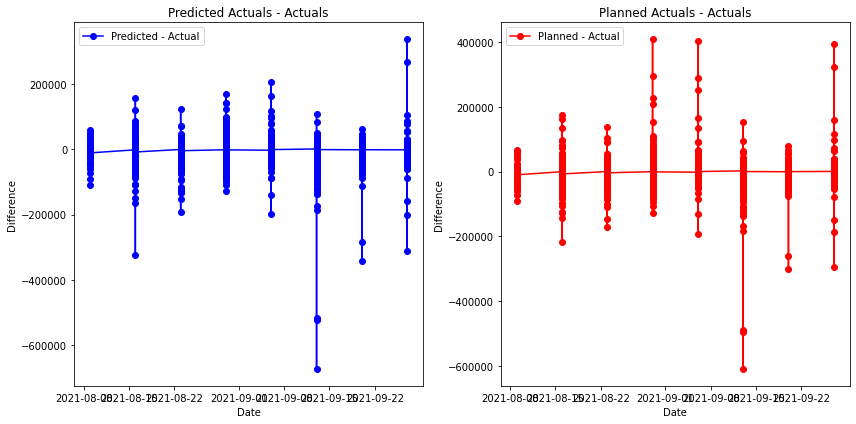

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Assuming sorted_df is defined and contains the necessary columns

# Create a DataFrame for the results
result_df = pd.DataFrame()
result_df['Date'] = sorted_df['Date'][train_size:]  # Assuming Date column is present in sorted_df

# Reshape test data for LSTM input shape
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Predict on the test set
predicted_scaled = model.predict(test_X_reshaped)

# Inverse transform the predicted values to the original scale
predicted = scaler_y.inverse_transform(predicted_scaled)

# Populate the result_df DataFrame with predicted values
result_df['Predicted'] = predicted.flatten()
result_df['Actual'] = test_y.values

# Calculate the differences
result_df['Predicted_Difference'] = result_df['Actual']-result_df['Predicted']
result_df['Planned_Difference'] = result_df['Actual']-sorted_df['Pln Ship Usd'][train_size:] 

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
plt.plot(result_df['Date'], result_df['Predicted_Difference'], label='Predicted - Actual', marker='o', color='blue')
plt.title('Predicted Actuals - Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
plt.plot(result_df['Date'], result_df['Planned_Difference'], label='Planned - Actual', marker='o', color='red')
plt.title('Planned Actuals - Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

plt.tight_layout()
plt.show()

# Box Plot

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Assuming sorted_df is defined and contains the necessary columns

# Create a DataFrame for the results
result_df = pd.DataFrame()
result_df['Date'] = sorted_df['Date'][train_size:]  # Assuming Date column is present in sorted_df

# Reshape test data for LSTM input shape
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Predict on the test set
predicted_scaled = model.predict(test_X_reshaped)

# Inverse transform the predicted values to the original scale
predicted = scaler_y.inverse_transform(predicted_scaled)

# Populate the result_df DataFrame with predicted values
result_df['Predicted'] = predicted.flatten()
result_df['Actual'] = test_y.values

# Calculate the differences
result_df['Predicted_Difference'] = result_df['Predicted'] - result_df['Actual']
result_df['Planned_Difference'] = sorted_df['Pln Ship Usd'][train_size:] - result_df['Actual']

# Plot the differences using box plots
plt.figure(figsize=(12, 6))

# Box plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
plt.boxplot(result_df['Predicted_Difference'])
plt.title('Predicted Actuals - Actuals')
plt.xlabel('Difference')
plt.ylabel('Difference Values')

# Box plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
plt.boxplot(result_df['Planned_Difference'])
plt.title('Planned Actuals - Actuals')
plt.xlabel('Difference')
plt.ylabel('Difference Values')

plt.tight_layout()
plt.show()

# Current Conclusion: Adding Customer Product Index as another input for prediction of Actuals typically overshoots in predicting actuals (higher) whereas the typical predictions inside the internal dataset tends to undershoot. The typical predictions also tend to undershoot with a lower absolute value meaning these predictions are actually closer than the current model utilizing Customer Product Index as another feature. 

# Hypothesis: More Pertinent Economic features such as Customer Product Index Food and Customer Product Index Percent Changes over month will improve the validation accuracy if accompanied with a slower learning rate for the model to adapt to the nuiansces within the data

# Trying to do Food Consumer Prodcut Index

In [1]:
import pandas as pd
PLN=pd.read_csv("PLN_TO_ITM_WK (KNA_COMRCL)_PLN_TO_ITM_WK.csv")
PLN

,All In Flg,Alt Segment,BU,Cal Wk,Can Catg,Catg,Curr,Fisc Yr,Lvl A,Lvl B,...,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Pln Ship Usd,Sugstd Base Vol Sas,Sugstd Shlf Prc Sas,Totl Pln Kmf Cost Of Prod Usd
0,F,PWS,K1,202301,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,PWS,K1,202302,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,PWS,K1,202303,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,PWS,K1,202304,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,PWS,K1,202305,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,F,CONVENIENCE,Specialty,202017,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325644,F,CONVENIENCE,Specialty,202018,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325645,F,CONVENIENCE,Specialty,202019,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325646,F,CONVENIENCE,Specialty,202020,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import pandas as pd
PLN=pd.read_csv("PLN_TO_ITM_WK (KNA_COMRCL)_PLN_TO_ITM_WK.csv")
PLN

pop_tarts = PLN[PLN['Prod Hier Brand Desc'] == 'Pop-Tarts'].copy()
pop_tarts

,All In Flg,Alt Segment,BU,Cal Wk,Can Catg,Catg,Curr,Fisc Yr,Lvl A,Lvl B,...,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Pln Ship Usd,Sugstd Base Vol Sas,Sugstd Shlf Prc Sas,Totl Pln Kmf Cost Of Prod Usd
0,F,PWS,K1,202301,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,PWS,K1,202302,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,PWS,K1,202303,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,PWS,K1,202304,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,PWS,K1,202305,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,F,CONVENIENCE,Specialty,202017,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325644,F,CONVENIENCE,Specialty,202018,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325645,F,CONVENIENCE,Specialty,202019,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325646,F,CONVENIENCE,Specialty,202020,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = pop_tarts['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [4]:
pop_tarts=pop_tarts[["Yr & Wk", "Pln Ship Usd", "Actl Ship Usd","Cal Wk", 'Pln Base Cs', 'Pln Base Lbs', 'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
    'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units', 'Pln Cons Usd', 'Pln Inc Usd',
    'Pln Incr Cs', 'Pln Incr Lbs', 'Pln Incr Rtn Usd', 'Pln Incr Ship Cs', 'Pln Incr Ship Kgs',
    'Pln Incr Ship Lbs', 'Pln Incr Ship Units', 'Pln Incr Ship Usd', 'Pln Incr Units',
    'Pln Kmf', 'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd', 'Pln Ship Cs', 'Pln Ship Ea',
    'Pln Ship Kg', 'Pln Ship Lbs']]
pop_tarts

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
0,2023&1,0.0,0.00,202301,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023&2,0.0,0.00,202302,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023&3,0.0,0.00,202303,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023&4,0.0,0.00,202304,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023&5,0.0,0.00,202305,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,2020&17,0.0,1252.80,202017,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325644,2020&18,0.0,1252.80,202018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325645,2020&19,0.0,99.72,202019,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325646,2020&20,0.0,626.40,202020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pop_tarts_filtered = pop_tarts[(pop_tarts['Pln Ship Usd'] != 0) | (pop_tarts['Actl Ship Usd'] != 0)].copy()
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
8,2023&9,2336.16,0.00,202309,248.0,325.62,0.0,1488.0,2336.16,325.62,...,0.0,0.0,0.0,0.0,2336.16,1259.84,248.0,1488.0,147.81,325.62
9,2023&10,2455.20,0.00,202310,248.0,325.62,0.0,1488.0,2455.20,325.62,...,0.0,0.0,0.0,0.0,2455.20,1378.88,248.0,1488.0,147.81,325.62
10,2023&11,2455.20,0.00,202311,248.0,325.62,0.0,1488.0,2455.20,325.62,...,0.0,0.0,0.0,0.0,2455.20,1378.88,248.0,1488.0,147.81,325.62
11,2023&12,2455.20,0.00,202312,248.0,325.62,0.0,1488.0,2455.20,325.62,...,0.0,0.0,0.0,0.0,2455.20,1378.88,248.0,1488.0,147.81,325.62
12,2023&13,2455.20,0.00,202313,248.0,325.62,0.0,1488.0,2455.20,325.62,...,0.0,0.0,0.0,0.0,2455.20,1378.88,248.0,1488.0,147.81,325.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,2020&17,0.00,1252.80,202017,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
1325644,2020&18,0.00,1252.80,202018,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
1325645,2020&19,0.00,99.72,202019,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
1325646,2020&20,0.00,626.40,202020,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00


In [6]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = pop_tarts_filtered['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [7]:
pop_tarts_filtered = pop_tarts_filtered[pop_tarts_filtered['Actl Ship Usd'] != 0.00].copy()
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
13,2023&14,2049.3,2856.00,202314,207.0,271.79,0.0,1242.0,2049.3,271.79,...,0.0,0.0,0.0,205.15,1844.15,945.77,207.0,1242.0,123.37,271.79
14,2023&15,2049.3,8772.00,202315,207.0,271.79,0.0,1242.0,2049.3,271.79,...,0.0,0.0,0.0,205.13,1844.17,945.79,207.0,1242.0,123.37,271.79
17,2023&18,2049.3,1428.00,202318,207.0,271.79,0.0,1242.0,2049.3,271.79,...,0.0,0.0,0.0,205.13,1844.17,945.79,207.0,1242.0,123.37,271.79
18,2023&19,2049.3,2244.00,202319,207.0,271.79,0.0,1242.0,2049.3,271.79,...,0.0,0.0,0.0,205.12,1844.18,945.80,207.0,1242.0,123.37,271.79
19,2023&20,2049.3,408.00,202320,207.0,271.79,0.0,1242.0,2049.3,271.79,...,0.0,0.0,0.0,205.14,1844.16,945.78,207.0,1242.0,123.37,271.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,2020&17,0.0,1252.80,202017,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00
1325644,2020&18,0.0,1252.80,202018,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00
1325645,2020&19,0.0,99.72,202019,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00
1325646,2020&20,0.0,626.40,202020,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00


In [8]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = pop_tarts_filtered['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [9]:
pop_tarts_filtered = pop_tarts_filtered[pop_tarts_filtered['Pln Ship Usd'] != 0.00].copy()
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
13,2023&14,2049.30,2856.00,202314,207.00,271.79,0.0,1242.00,2049.30,271.79,...,0.0,0.00,0.0,205.15,1844.15,945.77,207.00,1242.00,123.37,271.79
14,2023&15,2049.30,8772.00,202315,207.00,271.79,0.0,1242.00,2049.30,271.79,...,0.0,0.00,0.0,205.13,1844.17,945.79,207.00,1242.00,123.37,271.79
17,2023&18,2049.30,1428.00,202318,207.00,271.79,0.0,1242.00,2049.30,271.79,...,0.0,0.00,0.0,205.13,1844.17,945.79,207.00,1242.00,123.37,271.79
18,2023&19,2049.30,2244.00,202319,207.00,271.79,0.0,1242.00,2049.30,271.79,...,0.0,0.00,0.0,205.12,1844.18,945.80,207.00,1242.00,123.37,271.79
19,2023&20,2049.30,408.00,202320,207.00,271.79,0.0,1242.00,2049.30,271.79,...,0.0,0.00,0.0,205.14,1844.16,945.78,207.00,1242.00,123.37,271.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325410,2023&41,676.44,95.84,202341,12.12,85.48,0.0,96.93,580.60,85.48,...,16.0,95.84,0.0,120.75,555.69,208.01,14.12,112.93,45.17,99.59
1325412,2023&43,293.03,431.28,202343,12.12,85.47,0.0,96.92,580.55,85.47,...,-48.0,-287.52,0.0,51.75,241.28,90.67,6.12,48.92,19.57,43.14
1325413,2023&44,676.44,47.92,202344,12.12,85.48,0.0,96.93,580.60,85.48,...,16.0,95.84,0.0,120.75,555.69,208.01,14.12,112.93,45.17,99.59
1325414,2023&45,676.39,47.92,202345,12.12,85.47,0.0,96.92,580.55,85.47,...,16.0,95.84,0.0,120.75,555.64,207.99,14.12,112.92,45.17,99.58


In [10]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = pop_tarts_filtered['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [11]:
is_zero_in_pln = (pop_tarts_filtered['Pln Ship Usd'] == 0).any()
is_zero_in_actl = (pop_tarts_filtered['Actl Ship Usd'] == 0).any()

# Display the results
print(f"Any numeric value equal to 0 in 'Pln Ship Usd': {is_zero_in_pln}")
print(f"Any numeric value equal to 0 in 'Actl Ship Usd': {is_zero_in_actl}")

Any numeric value equal to 0 in 'Pln Ship Usd': False
Any numeric value equal to 0 in 'Actl Ship Usd': False


In [12]:
import pandas as pd
# Assuming pop_tarts_filtered is your existing DataFrame

# Filter rows where 'Pln Ship Usd' is not equal to 0.00

# Convert 'Cal Wk' column to integers
pop_tarts_filtered['Cal Wk'] = pop_tarts_filtered['Cal Wk'].astype(int)

# Sort the DataFrame by 'Cal Wk' in ascending order
pop_tarts_filtered = pop_tarts_filtered.sort_values(by='Cal Wk')

# Display the resulting DataFrame
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
588205,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,420.00,945.00,62.14,425.88,1005.12,572.67,53.00,636.00,244.23,538.43
524656,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,0.00,0.00,0.00,245.64,5696.16,4057.70,171.93,2063.12,1188.36,2619.82
731785,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,0.00,0.00,0.00,329.37,641.25,404.35,35.95,431.39,165.65,365.21
731524,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,0.00,0.00,0.00,329.39,1611.72,1029.39,71.89,862.72,331.28,730.36
730785,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,0.00,0.00,0.00,329.40,117.70,-79.98,12.94,155.24,89.42,197.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,2023&47,5438.66,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,-2202.59,-6475.61,4275.07,205.69,5232.97,4119.95,154.16,1849.88,710.35,1566.08
1108783,2023&47,13903.18,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,2688.00,7902.72,0.00,1556.99,12346.19,8992.56,394.08,4728.97,1815.94,4003.47
199285,2023&47,15876.00,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,0.00,0.00,0.00,3564.00,12312.00,8923.50,450.00,5400.00,2073.60,4571.55
629317,2023&47,28799.86,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,0.00,0.00,0.00,2699.99,26099.87,17031.16,625.00,7499.96,4319.98,9523.70


In [13]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = pop_tarts_filtered['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [14]:
import pandas as pd
food_changes=pd.read_csv("food changes.csv")
food_changes = food_changes.iloc[:, 1:]
food_changes = food_changes.rename(columns={'year': 'Year', 'Period': 'Month'})
food_changes['Month'] = food_changes['Month'].str.replace('M', '').astype(int)

In [15]:
food_changes

,Year,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change
0,2000,1,2000 Jan,166.100,0.4,0.6,1.5
1,2000,2,2000 Feb,166.300,0.1,0.7,1.8
2,2000,3,2000 Mar,166.500,0.1,0.7,2.0
3,2000,4,2000 Apr,166.600,0.1,0.3,2.0
4,2000,5,2000 May,167.300,0.4,0.6,2.2
...,...,...,...,...,...,...,...
284,2023,9,2023 Sep,324.704,0.2,0.7,3.7
285,2023,10,2023 Oct,325.731,0.3,0.7,3.3
286,2023,11,2023 Nov,325.172,-0.2,0.3,2.9
287,2023,12,2023 Dec,325.409,0.1,0.2,2.7


In [16]:
import pandas as pd

food_changes['Date'] = pd.to_datetime(food_changes[['Year', 'Month']].assign(DAY=1))

# Calculate the week of the year based on the Date
food_changes['Yr & Wk'] = food_changes['Date'].dt.strftime('%Y&%U')

# Display the updated DataFrame
food_changes

,Year,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date,Yr & Wk
0,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000-01-01,2000&00
1,2000,2,2000 Feb,166.300,0.1,0.7,1.8,2000-02-01,2000&05
2,2000,3,2000 Mar,166.500,0.1,0.7,2.0,2000-03-01,2000&09
3,2000,4,2000 Apr,166.600,0.1,0.3,2.0,2000-04-01,2000&13
4,2000,5,2000 May,167.300,0.4,0.6,2.2,2000-05-01,2000&18
...,...,...,...,...,...,...,...,...,...
284,2023,9,2023 Sep,324.704,0.2,0.7,3.7,2023-09-01,2023&35
285,2023,10,2023 Oct,325.731,0.3,0.7,3.3,2023-10-01,2023&40
286,2023,11,2023 Nov,325.172,-0.2,0.3,2.9,2023-11-01,2023&44
287,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023-12-01,2023&48


In [17]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = food_changes['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

False


In [18]:
import pandas as pd

# Assuming your DataFrame is named food_changes
# If not, replace "food_changes" with the actual name of your DataFrame

# Calculate the date based on Year and Month
food_changes['Date'] = pd.to_datetime(food_changes[['Year', 'Month']].assign(DAY=1))

# Set the Date column as the index
food_changes.set_index('Date', inplace=True)

# Resample the DataFrame to include all weeks and forward fill the values
resampled_df = food_changes.resample('W-Mon').ffill()

# Reset the index and create the Yr & Wk column
resampled_df.reset_index(inplace=True)
resampled_df['Yr & Wk'] = resampled_df['Date'].dt.strftime('%Y&%U')

# Display the updated DataFrame
resampled_df.head(25)

,Date,Year,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
0,2000-01-03,2000,1,2000 Jan,166.1,0.4,0.6,1.5,2000&01
1,2000-01-10,2000,1,2000 Jan,166.1,0.4,0.6,1.5,2000&02
2,2000-01-17,2000,1,2000 Jan,166.1,0.4,0.6,1.5,2000&03
3,2000-01-24,2000,1,2000 Jan,166.1,0.4,0.6,1.5,2000&04
4,2000-01-31,2000,1,2000 Jan,166.1,0.4,0.6,1.5,2000&05
5,2000-02-07,2000,2,2000 Feb,166.3,0.1,0.7,1.8,2000&06
6,2000-02-14,2000,2,2000 Feb,166.3,0.1,0.7,1.8,2000&07
7,2000-02-21,2000,2,2000 Feb,166.3,0.1,0.7,1.8,2000&08
8,2000-02-28,2000,2,2000 Feb,166.3,0.1,0.7,1.8,2000&09
9,2000-03-06,2000,3,2000 Mar,166.5,0.1,0.7,2.0,2000&10


In [19]:
print(resampled_df.isnull().sum())

Date                 0
Year                 0
Month                0
Label                0
Value                0
1-Month % Change     0
3-Month % Change     0
12-Month % Change    0
Yr & Wk              0
dtype: int64


In [20]:
# Replace 'your_column' with the actual column name, and 'your_value' with the specific value
desired_value = '2023&05'

# Filter the DataFrame based on the condition
filtered_row = resampled_df[resampled_df['Yr & Wk'] == desired_value]

# Display the result as a DataFrame
print(f"Rows where 'your_column' is equal to '{desired_value}':")
print(pd.DataFrame(filtered_row))


Rows where 'your_column' is equal to '2023&05':
           Date  Year  Month     Label    Value  1-Month % Change  \
1204 2023-01-30  2023      1  2023 Jan  319.136               0.7   

      3-Month % Change  12-Month % Change  Yr & Wk  
1204               1.2               10.1  2023&05  


In [21]:
# Values to check
'2023&06', '2023&07', '2023&08', '2023&09'
values_to_check = {'2023&06', '2023&07', '2023&08', '2023&09'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [22]:
# Filter rows where 'Yr & Wk' is equal to '2023&5'
rows_2023_5_filtered = resampled_df[resampled_df['Yr & Wk'] == '2023&05']

# Display the result as a DataFrame
print("Rows for '2023&5':")
print(pd.DataFrame(rows_2023_5_filtered))


Rows for '2023&5':
           Date  Year  Month     Label    Value  1-Month % Change  \
1204 2023-01-30  2023      1  2023 Jan  319.136               0.7   

      3-Month % Change  12-Month % Change  Yr & Wk  
1204               1.2               10.1  2023&05  


In [23]:
import pandas as pd
import numpy as np


# Calculate the date based on Year and Month
food_changes['Date'] = pd.to_datetime(food_changes[['Year', 'Month']].assign(DAY=1))

# Set the Date column as the index
food_changes.set_index('Date', inplace=True)

# Resample the DataFrame to include all weeks and forward fill the values
resampled_df = food_changes.resample('W-Mon').ffill()

# Reset the index and create the Yr & Wk column
resampled_df.reset_index(inplace=True)
resampled_df['Yr & Wk'] = resampled_df['Date'].dt.strftime('%Y&%U')

resampled_df

,Date,Year,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
0,2000-01-03,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000&01
1,2000-01-10,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000&02
2,2000-01-17,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000&03
3,2000-01-24,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000&04
4,2000-01-31,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000&05
...,...,...,...,...,...,...,...,...,...
1248,2023-12-04,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&49
1249,2023-12-11,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&50
1250,2023-12-18,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&51
1251,2023-12-25,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&52


In [24]:
values_to_check = {'2023&06', '2023&07', '2023&08', '2023&09'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [25]:
# Find the index of the first occurrence of Year=2020 and Month=1
first_2020_01_index = resampled_df[(resampled_df['Year'] == 2020) & (resampled_df['Month'] == 1)].index.min()

# Keep only rows after the first occurrence of Year=2020 and Month=1
resampled_df = resampled_df.loc[first_2020_01_index:]

# Display the updated DataFrame
resampled_df

,Date,Year,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,2020-01-06,2020,1,2020 Jan,261.057,0.5,0.5,1.8,2020&01
1045,2020-01-13,2020,1,2020 Jan,261.057,0.5,0.5,1.8,2020&02
1046,2020-01-20,2020,1,2020 Jan,261.057,0.5,0.5,1.8,2020&03
1047,2020-01-27,2020,1,2020 Jan,261.057,0.5,0.5,1.8,2020&04
1048,2020-02-03,2020,2,2020 Feb,261.876,0.3,0.9,1.8,2020&05
...,...,...,...,...,...,...,...,...,...
1248,2023-12-04,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&49
1249,2023-12-11,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&50
1250,2023-12-18,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&51
1251,2023-12-25,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&52


In [26]:
values_to_check = {'2023&06', '2023&07', '2023&08', '2023&09'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [27]:
columns_to_drop = ['Date', 'Year', 'Month', 'Label']
resampled_df = resampled_df.drop(columns=columns_to_drop)
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,261.057,0.5,0.5,1.8,2020&01
1045,261.057,0.5,0.5,1.8,2020&02
1046,261.057,0.5,0.5,1.8,2020&03
1047,261.057,0.5,0.5,1.8,2020&04
1048,261.876,0.3,0.9,1.8,2020&05
...,...,...,...,...,...
1248,325.409,0.1,0.2,2.7,2023&49
1249,325.409,0.1,0.2,2.7,2023&50
1250,325.409,0.1,0.2,2.7,2023&51
1251,325.409,0.1,0.2,2.7,2023&52


In [28]:
values_to_check = {'2023&06', '2023&07', '2023&08', '2023&09'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [29]:
resampled_df[['Year', 'Week']] = resampled_df['Yr & Wk'].str.split('&', expand=True)
resampled_df['Week'] = resampled_df['Week'].astype(int).astype(str).str.lstrip('0')
resampled_df['Yr & Wk'] = resampled_df['Year'] + '&' + resampled_df['Week']
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk,Year,Week
1044,261.057,0.5,0.5,1.8,2020&1,2020,1
1045,261.057,0.5,0.5,1.8,2020&2,2020,2
1046,261.057,0.5,0.5,1.8,2020&3,2020,3
1047,261.057,0.5,0.5,1.8,2020&4,2020,4
1048,261.876,0.3,0.9,1.8,2020&5,2020,5
...,...,...,...,...,...,...,...
1248,325.409,0.1,0.2,2.7,2023&49,2023,49
1249,325.409,0.1,0.2,2.7,2023&50,2023,50
1250,325.409,0.1,0.2,2.7,2023&51,2023,51
1251,325.409,0.1,0.2,2.7,2023&52,2023,52


In [30]:
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [31]:
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk,Year,Week
1044,261.057,0.5,0.5,1.8,2020&1,2020,1
1045,261.057,0.5,0.5,1.8,2020&2,2020,2
1046,261.057,0.5,0.5,1.8,2020&3,2020,3
1047,261.057,0.5,0.5,1.8,2020&4,2020,4
1048,261.876,0.3,0.9,1.8,2020&5,2020,5
...,...,...,...,...,...,...,...
1248,325.409,0.1,0.2,2.7,2023&49,2023,49
1249,325.409,0.1,0.2,2.7,2023&50,2023,50
1250,325.409,0.1,0.2,2.7,2023&51,2023,51
1251,325.409,0.1,0.2,2.7,2023&52,2023,52


In [32]:
resampled_df = resampled_df.drop(resampled_df.index[-1])
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk,Year,Week
1044,261.057,0.5,0.5,1.8,2020&1,2020,1
1045,261.057,0.5,0.5,1.8,2020&2,2020,2
1046,261.057,0.5,0.5,1.8,2020&3,2020,3
1047,261.057,0.5,0.5,1.8,2020&4,2020,4
1048,261.876,0.3,0.9,1.8,2020&5,2020,5
...,...,...,...,...,...,...,...
1247,325.172,-0.2,0.3,2.9,2023&48,2023,48
1248,325.409,0.1,0.2,2.7,2023&49,2023,49
1249,325.409,0.1,0.2,2.7,2023&50,2023,50
1250,325.409,0.1,0.2,2.7,2023&51,2023,51


In [33]:
resampled_df = resampled_df.drop(columns=['Year', 'Week'])
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,261.057,0.5,0.5,1.8,2020&1
1045,261.057,0.5,0.5,1.8,2020&2
1046,261.057,0.5,0.5,1.8,2020&3
1047,261.057,0.5,0.5,1.8,2020&4
1048,261.876,0.3,0.9,1.8,2020&5
...,...,...,...,...,...
1247,325.172,-0.2,0.3,2.9,2023&48
1248,325.409,0.1,0.2,2.7,2023&49
1249,325.409,0.1,0.2,2.7,2023&50
1250,325.409,0.1,0.2,2.7,2023&51


In [34]:
print(resampled_df.isnull().sum())

Value                0
1-Month % Change     0
3-Month % Change     0
12-Month % Change    0
Yr & Wk              0
dtype: int64


In [35]:
#resampled_df = resampled_df[resampled_df['Yr & Wk'] <= '2023&47']

In [36]:
# Define the values to exclude
exclude_values = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Use the condition to filter rows, excluding specific values
resampled_df_filtered = resampled_df[(resampled_df['Yr & Wk'] <= '2023&47') & (~resampled_df['Yr & Wk'].isin(exclude_values))]

# Display the updated DataFrame
resampled_df_filtered


,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,261.057,0.5,0.5,1.8,2020&1
1045,261.057,0.5,0.5,1.8,2020&2
1046,261.057,0.5,0.5,1.8,2020&3
1047,261.057,0.5,0.5,1.8,2020&4
1048,261.876,0.3,0.9,1.8,2020&5
...,...,...,...,...,...
1242,325.731,0.3,0.7,3.3,2023&43
1243,325.731,0.3,0.7,3.3,2023&44
1244,325.172,-0.2,0.3,2.9,2023&45
1245,325.172,-0.2,0.3,2.9,2023&46


In [37]:
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,261.057,0.5,0.5,1.8,2020&1
1045,261.057,0.5,0.5,1.8,2020&2
1046,261.057,0.5,0.5,1.8,2020&3
1047,261.057,0.5,0.5,1.8,2020&4
1048,261.876,0.3,0.9,1.8,2020&5
...,...,...,...,...,...
1247,325.172,-0.2,0.3,2.9,2023&48
1248,325.409,0.1,0.2,2.7,2023&49
1249,325.409,0.1,0.2,2.7,2023&50
1250,325.409,0.1,0.2,2.7,2023&51


In [38]:
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [39]:
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
588205,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,420.00,945.00,62.14,425.88,1005.12,572.67,53.00,636.00,244.23,538.43
524656,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,0.00,0.00,0.00,245.64,5696.16,4057.70,171.93,2063.12,1188.36,2619.82
731785,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,0.00,0.00,0.00,329.37,641.25,404.35,35.95,431.39,165.65,365.21
731524,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,0.00,0.00,0.00,329.39,1611.72,1029.39,71.89,862.72,331.28,730.36
730785,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,0.00,0.00,0.00,329.40,117.70,-79.98,12.94,155.24,89.42,197.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,2023&47,5438.66,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,-2202.59,-6475.61,4275.07,205.69,5232.97,4119.95,154.16,1849.88,710.35,1566.08
1108783,2023&47,13903.18,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,2688.00,7902.72,0.00,1556.99,12346.19,8992.56,394.08,4728.97,1815.94,4003.47
199285,2023&47,15876.00,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,0.00,0.00,0.00,3564.00,12312.00,8923.50,450.00,5400.00,2073.60,4571.55
629317,2023&47,28799.86,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,0.00,0.00,0.00,2699.99,26099.87,17031.16,625.00,7499.96,4319.98,9523.70


In [40]:
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,261.057,0.5,0.5,1.8,2020&1
1045,261.057,0.5,0.5,1.8,2020&2
1046,261.057,0.5,0.5,1.8,2020&3
1047,261.057,0.5,0.5,1.8,2020&4
1048,261.876,0.3,0.9,1.8,2020&5
...,...,...,...,...,...
1247,325.172,-0.2,0.3,2.9,2023&48
1248,325.409,0.1,0.2,2.7,2023&49
1249,325.409,0.1,0.2,2.7,2023&50
1250,325.409,0.1,0.2,2.7,2023&51


In [41]:

remove_values = {'2023&49', '2023&50', '2023&51', '2023&48', '2023&52'}

# Use the condition to filter rows, excluding specific values
resampled_df = resampled_df[~resampled_df['Yr & Wk'].isin(remove_values)]

In [42]:
print(resampled_df.isnull().sum())

Value                0
1-Month % Change     0
3-Month % Change     0
12-Month % Change    0
Yr & Wk              0
dtype: int64


In [43]:
# Define the value to remove
remove_value = '2020&53'

# Use the condition to filter rows, excluding the specified value
pop_tarts_filtered = pop_tarts_filtered[pop_tarts_filtered['Yr & Wk'] != remove_value]

# Display the updated DataFrame
print(pop_tarts_filtered)


         Yr & Wk  Pln Ship Usd  Actl Ship Usd  Cal Wk  Pln Base Cs  \
588205    2020&1       1431.00        2160.00  202001        18.00   
524656    2020&1       5941.80        2073.60  202001       171.93   
731785    2020&1        970.62         540.00  202001        35.95   
731524    2020&1       1941.11        1080.00  202001        71.89   
730785    2020&1        447.10         518.40  202001        12.94   
...          ...           ...            ...     ...          ...   
15748    2023&47       5438.66       22320.00  202347       337.71   
1108783  2023&47      13903.18        4939.20  202347       170.08   
199285   2023&47      15876.00        2822.40  202347       450.00   
629317   2023&47      28799.86       13824.00  202347       625.00   
1325416  2023&47        293.08        2689.28  202347        12.12   

         Pln Base Lbs  Pln Base Rtn Usd  Pln Base Units  Pln Base Usd  \
588205         182.86            432.00          216.00        486.00   
524656       

In [44]:
# Print unique values in 'Yr & Wk' for pop_tarts
pop_tarts_unique = pop_tarts_filtered['Yr & Wk'].unique()
print("Unique values in 'Yr & Wk' for pop_tarts:")
print(pop_tarts_unique)

# Print unique values in 'Yr & Wk' for resampled_df
resampled_df_unique = resampled_df['Yr & Wk'].unique()
print("\nUnique values in 'Yr & Wk' for resampled_df:")
print(resampled_df_unique)

# Check if unique values are equal
are_equal = set(pop_tarts_unique) == set(resampled_df_unique)
print("\nAre unique values equal between pop_tarts and resampled_df?", are_equal)

Unique values in 'Yr & Wk' for pop_tarts:
['2020&1' '2020&2' '2020&3' '2020&4' '2020&5' '2020&6' '2020&7' '2020&8'
 '2020&9' '2020&10' '2020&11' '2020&12' '2020&13' '2020&14' '2020&15'
 '2020&16' '2020&17' '2020&18' '2020&19' '2020&20' '2020&21' '2020&22'
 '2020&23' '2020&24' '2020&25' '2020&26' '2020&27' '2020&28' '2020&29'
 '2020&30' '2020&31' '2020&32' '2020&33' '2020&34' '2020&35' '2020&36'
 '2020&37' '2020&38' '2020&39' '2020&40' '2020&41' '2020&42' '2020&43'
 '2020&44' '2020&45' '2020&46' '2020&47' '2020&48' '2020&49' '2020&50'
 '2020&51' '2020&52' '2021&1' '2021&2' '2021&3' '2021&4' '2021&5' '2021&6'
 '2021&7' '2021&8' '2021&9' '2021&10' '2021&11' '2021&12' '2021&13'
 '2021&14' '2021&15' '2021&16' '2021&17' '2021&18' '2021&19' '2021&20'
 '2021&21' '2021&22' '2021&23' '2021&24' '2021&25' '2021&26' '2021&27'
 '2021&28' '2021&29' '2021&30' '2021&31' '2021&32' '2021&33' '2021&34'
 '2021&35' '2021&36' '2021&37' '2021&38' '2021&39' '2021&40' '2021&41'
 '2021&42' '2021&43' '2021&44' '2

In [45]:
# Identify the difference between unique values
difference_pop_tarts = set(pop_tarts_unique) - set(resampled_df_unique)
difference_resampled_df = set(resampled_df_unique) - set(pop_tarts_unique)

# Print the differences
print("\nUnique values in pop_tarts but not in resampled_df:")
print(difference_pop_tarts)

print("\nUnique values in resampled_df but not in pop_tarts:")
print(difference_resampled_df)


Unique values in pop_tarts but not in resampled_df:
set()

Unique values in resampled_df but not in pop_tarts:
set()


In [46]:
import pandas as pd

# Assuming you have resampled_df and pop_tarts_filtered DataFrames

pop_tarts_filtered['Yr & Wk'] = pop_tarts_filtered['Yr & Wk'].astype(str)



# Merge DataFrames based on the 'Yr & Wk' column
merged_df = pd.merge(pop_tarts_filtered, resampled_df[['Yr & Wk', 'Value', '1-Month % Change', '3-Month % Change', '12-Month % Change']],
                     how='left', left_on='Yr & Wk', right_on='Yr & Wk')

# Display the merged DataFrame
merged_df.head(400)

/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change
0,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,1005.12,572.67,53.00,636.00,244.23,538.43,261.057,0.5,0.5,1.8
1,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,5696.16,4057.70,171.93,2063.12,1188.36,2619.82,261.057,0.5,0.5,1.8
2,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,641.25,404.35,35.95,431.39,165.65,365.21,261.057,0.5,0.5,1.8
3,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,1611.72,1029.39,71.89,862.72,331.28,730.36,261.057,0.5,0.5,1.8
4,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,117.70,-79.98,12.94,155.24,89.42,197.13,261.057,0.5,0.5,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2020&2,324.89,540.00,202002,12.03,122.24,417.30,144.40,324.89,122.24,...,302.03,225.98,12.03,144.40,55.45,122.24,261.057,0.5,0.5,1.8
396,2020&2,230676.21,85411.52,202002,7376.59,74872.35,217166.69,59012.69,210085.17,83094.21,...,182078.69,84478.68,8099.59,64796.69,37290.47,82210.80,261.057,0.5,0.5,1.8
397,2020&2,12312.00,12441.60,202002,855.00,1870.74,12782.25,4275.00,12312.00,1870.74,...,10046.25,5258.25,855.00,4275.00,848.16,1870.74,261.057,0.5,0.5,1.8
398,2020&2,2568.24,1879.20,202002,0.00,0.00,0.00,0.00,0.00,46.63,...,1512.32,601.30,82.00,984.00,393.52,867.56,261.057,0.5,0.5,1.8


In [47]:
print(merged_df.isnull().sum())

Yr & Wk                0
Pln Ship Usd           0
Actl Ship Usd          0
Cal Wk                 0
Pln Base Cs            0
Pln Base Lbs           0
Pln Base Rtn Usd       0
Pln Base Units         0
Pln Base Usd           0
Pln Cons Lbs           0
Pln Cons Rtn Usd       0
Pln Cons Units         0
Pln Cons Usd           0
Pln Inc Usd            0
Pln Incr Cs            0
Pln Incr Lbs           0
Pln Incr Rtn Usd       0
Pln Incr Ship Cs       0
Pln Incr Ship Kgs      0
Pln Incr Ship Lbs      0
Pln Incr Ship Units    0
Pln Incr Ship Usd      0
Pln Incr Units         0
Pln Kmf                0
Pln Nsv Prxy Usd       0
Pln Sc Prxy Usd        0
Pln Ship Cs            0
Pln Ship Ea            0
Pln Ship Kg            0
Pln Ship Lbs           0
Value                  0
1-Month % Change       0
3-Month % Change       0
12-Month % Change      0
dtype: int64


In [48]:
merged_df['Date'] = pd.to_datetime(merged_df['Yr & Wk'] + '0', format='%Y&%W%w')
merged_df
merged_df.head(400)

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date
0,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,572.67,53.00,636.00,244.23,538.43,261.057,0.5,0.5,1.8,2020-01-12
1,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,4057.70,171.93,2063.12,1188.36,2619.82,261.057,0.5,0.5,1.8,2020-01-12
2,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,404.35,35.95,431.39,165.65,365.21,261.057,0.5,0.5,1.8,2020-01-12
3,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,1029.39,71.89,862.72,331.28,730.36,261.057,0.5,0.5,1.8,2020-01-12
4,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,-79.98,12.94,155.24,89.42,197.13,261.057,0.5,0.5,1.8,2020-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2020&2,324.89,540.00,202002,12.03,122.24,417.30,144.40,324.89,122.24,...,225.98,12.03,144.40,55.45,122.24,261.057,0.5,0.5,1.8,2020-01-19
396,2020&2,230676.21,85411.52,202002,7376.59,74872.35,217166.69,59012.69,210085.17,83094.21,...,84478.68,8099.59,64796.69,37290.47,82210.80,261.057,0.5,0.5,1.8,2020-01-19
397,2020&2,12312.00,12441.60,202002,855.00,1870.74,12782.25,4275.00,12312.00,1870.74,...,5258.25,855.00,4275.00,848.16,1870.74,261.057,0.5,0.5,1.8,2020-01-19
398,2020&2,2568.24,1879.20,202002,0.00,0.00,0.00,0.00,0.00,46.63,...,601.30,82.00,984.00,393.52,867.56,261.057,0.5,0.5,1.8,2020-01-19


In [49]:
merged_df.columns

Index(['Yr & Wk', 'Pln Ship Usd', 'Actl Ship Usd', 'Cal Wk', 'Pln Base Cs',
       'Pln Base Lbs', 'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
       'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units', 'Pln Cons Usd',
       'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs', 'Pln Incr Rtn Usd',
       'Pln Incr Ship Cs', 'Pln Incr Ship Kgs', 'Pln Incr Ship Lbs',
       'Pln Incr Ship Units', 'Pln Incr Ship Usd', 'Pln Incr Units', 'Pln Kmf',
       'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd', 'Pln Ship Cs', 'Pln Ship Ea',
       'Pln Ship Kg', 'Pln Ship Lbs', 'Value', '1-Month % Change',
       '3-Month % Change', '12-Month % Change', 'Date'],
      dtype='object')

In [50]:
merged_df

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date
0,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,572.67,53.00,636.00,244.23,538.43,261.057,0.5,0.5,1.8,2020-01-12
1,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,4057.70,171.93,2063.12,1188.36,2619.82,261.057,0.5,0.5,1.8,2020-01-12
2,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,404.35,35.95,431.39,165.65,365.21,261.057,0.5,0.5,1.8,2020-01-12
3,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,1029.39,71.89,862.72,331.28,730.36,261.057,0.5,0.5,1.8,2020-01-12
4,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,-79.98,12.94,155.24,89.42,197.13,261.057,0.5,0.5,1.8,2020-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.66,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,4119.95,154.16,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-26
234999,2023&47,13903.18,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,8992.56,394.08,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-26
235000,2023&47,15876.00,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,8923.50,450.00,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-26
235001,2023&47,28799.86,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,17031.16,625.00,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-26


In [51]:
merged_df

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date
0,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,572.67,53.00,636.00,244.23,538.43,261.057,0.5,0.5,1.8,2020-01-12
1,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,4057.70,171.93,2063.12,1188.36,2619.82,261.057,0.5,0.5,1.8,2020-01-12
2,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,404.35,35.95,431.39,165.65,365.21,261.057,0.5,0.5,1.8,2020-01-12
3,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,1029.39,71.89,862.72,331.28,730.36,261.057,0.5,0.5,1.8,2020-01-12
4,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,-79.98,12.94,155.24,89.42,197.13,261.057,0.5,0.5,1.8,2020-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.66,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,4119.95,154.16,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-26
234999,2023&47,13903.18,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,8992.56,394.08,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-26
235000,2023&47,15876.00,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,8923.50,450.00,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-26
235001,2023&47,28799.86,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,17031.16,625.00,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-26


In [52]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Assuming 'Date' is a datetime column

# Function to remove outliers for each unique date
def remove_outliers(df, column_name, percentage):
    # Group by date and apply the removal of outliers
    df_no_outliers = df.groupby('Date').apply(
        lambda x: x[
            (x[column_name] >= x[column_name].quantile(percentage / 2)) &
            (x[column_name] <= x[column_name].quantile(1 - percentage / 2))
        ]
    ).reset_index(drop=True)
    return df_no_outliers

# Specify the column and percentage of outliers to remove
column_to_remove_outliers = 'Pln Ship Usd'
outlier_percentage = 0.35  # 10% on each side

# Remove outliers
merged_df_no_outliers = remove_outliers(merged_df, column_to_remove_outliers, outlier_percentage)

# Check the shape before and after removing outliers
print(f"Original DataFrame shape: {merged_df.shape}")
print(f"DataFrame shape after removing outliers: {merged_df_no_outliers.shape}")

# Now you can use merged_df_no_outliers for further analysis or modeling

Original DataFrame shape: (235003, 35)
DataFrame shape after removing outliers: (152710, 35)


In [53]:
print(merged_df_no_outliers.isnull().sum())

Yr & Wk                0
Pln Ship Usd           0
Actl Ship Usd          0
Cal Wk                 0
Pln Base Cs            0
Pln Base Lbs           0
Pln Base Rtn Usd       0
Pln Base Units         0
Pln Base Usd           0
Pln Cons Lbs           0
Pln Cons Rtn Usd       0
Pln Cons Units         0
Pln Cons Usd           0
Pln Inc Usd            0
Pln Incr Cs            0
Pln Incr Lbs           0
Pln Incr Rtn Usd       0
Pln Incr Ship Cs       0
Pln Incr Ship Kgs      0
Pln Incr Ship Lbs      0
Pln Incr Ship Units    0
Pln Incr Ship Usd      0
Pln Incr Units         0
Pln Kmf                0
Pln Nsv Prxy Usd       0
Pln Sc Prxy Usd        0
Pln Ship Cs            0
Pln Ship Ea            0
Pln Ship Kg            0
Pln Ship Lbs           0
Value                  0
1-Month % Change       0
3-Month % Change       0
12-Month % Change      0
Date                   0
dtype: int64


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Assuming merged_df_no_outliers is defined and contains the necessary columns

# Extract the relevant columns for prediction
# Sort the dataframe by date
merged_df_no_outliers = merged_df_no_outliers.sort_values(by='Date')

# Extract the relevant columns for prediction
selected_columns = ['Pln Ship Usd', 'Pln Base Cs', 'Pln Base Lbs',
                    'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
                    'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units',
                    'Pln Cons Usd', 'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs',
                    'Pln Incr Rtn Usd', 'Pln Incr Ship Cs', 'Pln Incr Ship Kgs',
                    'Pln Incr Ship Lbs', 'Pln Incr Ship Units', 'Pln Incr Ship Usd',
                    'Pln Incr Units', 'Pln Kmf', 'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd',
                    'Pln Ship Cs', 'Pln Ship Ea', 'Pln Ship Kg', 'Pln Ship Lbs',
                    'Value', '1-Month % Change', '3-Month % Change', '12-Month % Change']

# Create feature and target data
X = merged_df_no_outliers[selected_columns].values
y = merged_df_no_outliers['Actl Ship Usd'].values

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
train_X, test_X = X[:train_size, :], X[train_size:, :]
train_y, test_y = y[:train_size], y[train_size:]

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

train_X_scaled = scaler_X.fit_transform(train_X)
train_y_scaled = scaler_y.fit_transform(train_y.reshape(-1, 1))

# Reshape the data for LSTM input shape
train_X_reshaped = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_X_reshaped, train_y_scaled, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3818/3818 [==============================] - 6s 1ms/step - loss: 0.7893
Epoch 2/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7786
Epoch 3/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7741
Epoch 4/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7700
Epoch 5/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7666
Epoch 6/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7646
Epoch 7/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7624
Epoch 8/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7604
Epoch 9/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7575
Epoch 10/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7565
Epoch 11/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7549
Epoch 12/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7521
E

In [55]:
# Prepare the test data
test_X_scaled = scaler_X.transform(test_X)
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Predict on the test set
predicted_scaled = model.predict(test_X_reshaped)

# Inverse transform the predicted values to the original scale
predicted = scaler_y.inverse_transform(predicted_scaled)

# Create a DataFrame for the results
result_df = pd.DataFrame()
result_df['Date'] = merged_df_no_outliers['Date'][train_size:]

# Populate the result_df DataFrame with predicted values
result_df['Predicted'] = predicted.flatten()
result_df['Actual'] = test_y

# Calculate the differences
result_df['Predicted_Difference'] = result_df['Actual'] - result_df['Predicted']
result_df['Planned_Difference'] = result_df['Actual']-merged_df_no_outliers['Pln Ship Usd'][train_size:] 

result_df = result_df.sort_values(by='Date')


In [56]:

import pandas as pd

# Assuming merged_df is your DataFrame
# Assuming 'Yr & Wk' is a column representing year and week information

# Extract year and week information from 'Yr & Wk' column
merged_df['Year'] = merged_df['Yr & Wk'].str.split('&').str[0].astype(int)
merged_df['Week'] = merged_df['Yr & Wk'].str.split('&').str[1].astype(int)

# Create a new 'Date' column using the year and week information
merged_df['Date'] = pd.to_datetime(merged_df['Year'].astype(str) + merged_df['Week'].astype(str) + '1', format='%Y%U%w')
merged_df
# Assuming 'merged_df' is your DataFrame
selected_rows = merged_df[merged_df['Date']>='2023-02-06']
# Display the resulting DataFrame
selected_rows

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date,Year,Week
188422,2023&6,339278.64,227082.24,202306,9466.48,128223.47,355182.33,75731.84,339278.64,128223.47,...,75731.84,58162.05,128223.47,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188423,2023&6,1541.49,2577.60,202306,28.88,440.10,1036.29,346.58,1240.77,462.49,...,430.58,248.02,546.77,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188424,2023&6,3300.14,12888.00,202306,128.82,1962.94,5410.40,1545.83,5534.06,2923.21,...,921.83,530.98,1170.57,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188425,2023&6,230.40,46.08,202306,5.00,76.05,293.40,60.00,230.40,76.05,...,60.00,34.50,76.05,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188426,2023&6,1707.56,2630.40,202306,73.03,741.91,2883.22,876.36,2401.23,630.82,...,623.20,239.31,527.59,320.569,0.4,1.5,9.5,2023-02-06,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.66,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
234999,2023&47,13903.18,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235000,2023&47,15876.00,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235001,2023&47,28799.86,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-20,2023,47


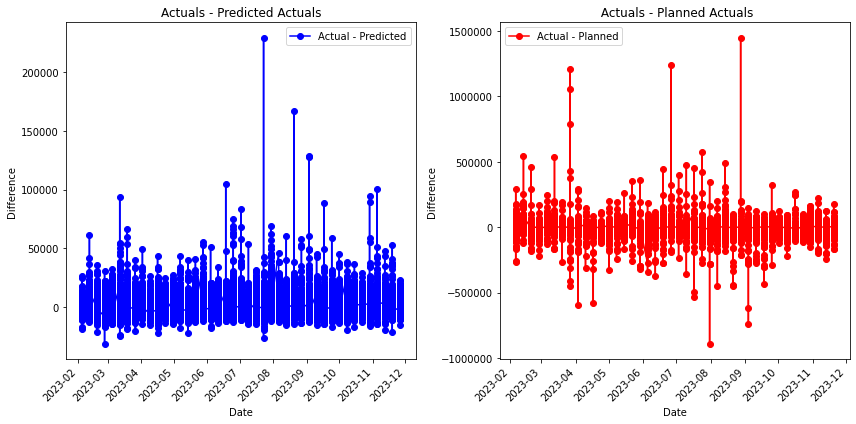

In [57]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
plt.plot(result_df['Date'], result_df['Predicted_Difference'], label='Actual - Predicted', marker='o', color='blue')
plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
plt.plot(selected_rows['Date'], selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd'],
         label='Actual - Planned', marker='o', color='red')
plt.title(' Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Adjust y-axis formatting to show full numbers
plt.ticklabel_format(axis='y', style='plain')  # This line ensures the y-axis labels are not in scientific notation

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


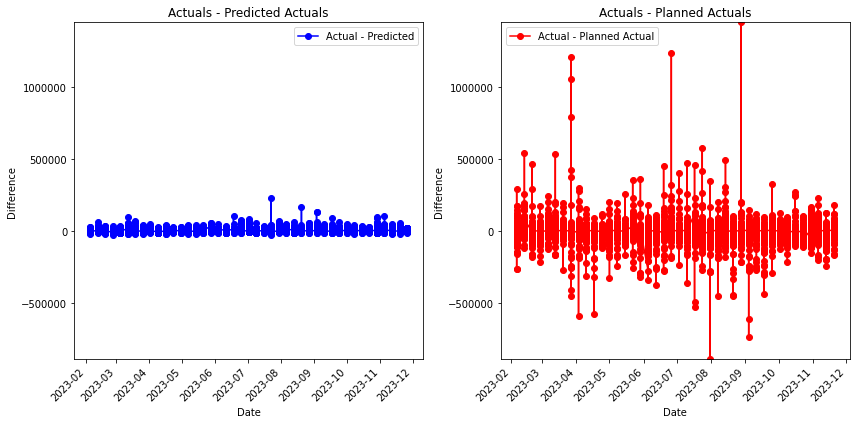

In [58]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
plt.plot(result_df['Date'], result_df['Predicted_Difference'], label='Actual - Predicted', marker='o', color='blue')
plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
plt.plot(selected_rows['Date'], selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd'],
         label='Actual - Planned Actual', marker='o', color='red')
plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.ticklabel_format(axis='y', style='plain')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


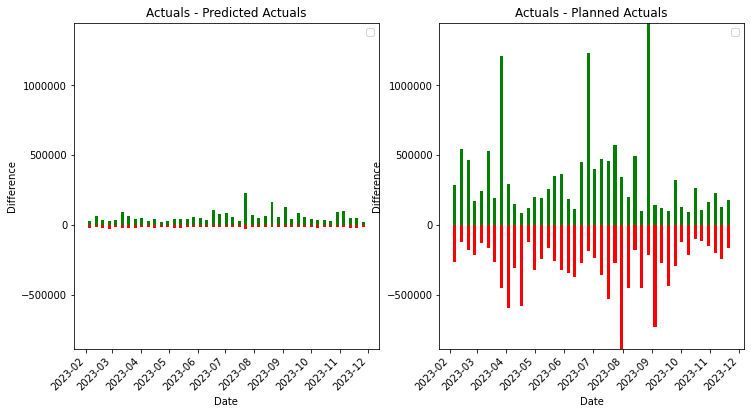

In [59]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
predicted_difference = result_df['Predicted_Difference']

plt.bar(result_df['Date'], predicted_difference, color=np.where(predicted_difference > 0, 'green', 'red'), align='center', width=3.2)

plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
planned_actual_difference = selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']

plt.bar(selected_rows['Date'], planned_actual_difference, color=np.where(planned_actual_difference > 0, 'green', 'red'), align='center', width=3.2)

plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(axis='y', style='plain')

# Replace Outliers Instead of Remove

In [60]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Assuming 'Date' is a datetime column

# Function to replace outliers with the average for each unique date
def replace_outliers_with_average(df, column_name, percentage):
    # Calculate the lower and upper bounds for outliers
    lower_bound = df[column_name].quantile(percentage / 2)
    upper_bound = df[column_name].quantile(1 - percentage / 2)

    # Replace outliers with the average for each date
    df[column_name] = df.groupby('Date')[column_name].apply(
        lambda x: x.clip(lower=x.median() - x.std(), upper=x.median() + x.std())
    )

    return df

# Specify the column and percentage of outliers to replace
column_to_replace_outliers = 'Pln Ship Usd'
outlier_percentage = 0.5  # 10% on each side

# Replace outliers with the average
merged_df_no_outliers = replace_outliers_with_average(merged_df, column_to_replace_outliers, outlier_percentage)

# Check the shape before and after replacing outliers
print(f"Original DataFrame shape: {merged_df.shape}")
print(f"DataFrame shape after replacing outliers: {merged_df_no_outliers.shape}")

# Now you can use merged_df_no_outliers for further analysis or modeling

Original DataFrame shape: (235003, 37)
DataFrame shape after replacing outliers: (235003, 37)


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Assuming merged_df_no_outliers is defined and contains the necessary columns

# Extract the relevant columns for prediction
# Sort the dataframe by date
merged_df_no_outliers = merged_df_no_outliers.sort_values(by='Date')

# Extract the relevant columns for prediction
selected_columns = ['Pln Ship Usd', 'Pln Base Cs', 'Pln Base Lbs',
                    'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
                    'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units',
                    'Pln Cons Usd', 'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs',
                    'Pln Incr Rtn Usd', 'Pln Incr Ship Cs', 'Pln Incr Ship Kgs',
                    'Pln Incr Ship Lbs', 'Pln Incr Ship Units', 'Pln Incr Ship Usd',
                    'Pln Incr Units', 'Pln Kmf', 'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd',
                    'Pln Ship Cs', 'Pln Ship Ea', 'Pln Ship Kg', 'Pln Ship Lbs',
                    'Value', '1-Month % Change', '3-Month % Change', '12-Month % Change']

# Create feature and target data
X = merged_df_no_outliers[selected_columns].values
y = merged_df_no_outliers['Actl Ship Usd'].values

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
train_X, test_X = X[:train_size, :], X[train_size:, :]
train_y, test_y = y[:train_size], y[train_size:]

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

train_X_scaled = scaler_X.fit_transform(train_X)
train_y_scaled = scaler_y.fit_transform(train_y.reshape(-1, 1))

# Reshape the data for LSTM input shape
train_X_reshaped = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_X_reshaped, train_y_scaled, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
5876/5876 [==============================] - 9s 1ms/step - loss: 0.3184
Epoch 2/50
5876/5876 [==============================] - 8s 1ms/step - loss: 0.2942
Epoch 3/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2927
Epoch 4/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2795
Epoch 5/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2825
Epoch 6/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2815
Epoch 7/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2723
Epoch 8/50
5876/5876 [==============================] - 8s 1ms/step - loss: 0.2730
Epoch 9/50
5876/5876 [==============================] - 8s 1ms/step - loss: 0.2763
Epoch 10/50
5876/5876 [==============================] - 8s 1ms/step - loss: 0.2742
Epoch 11/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2706
Epoch 12/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2692
E

In [62]:
# Prepare the test data
test_X_scaled = scaler_X.transform(test_X)
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Predict on the test set
predicted_scaled = model.predict(test_X_reshaped)

# Inverse transform the predicted values to the original scale
predicted = scaler_y.inverse_transform(predicted_scaled)

# Create a DataFrame for the results
result_df = pd.DataFrame()
result_df['Date'] = merged_df_no_outliers['Date'][train_size:]

# Populate the result_df DataFrame with predicted values
result_df['Predicted'] = predicted.flatten()
result_df['Actual'] = test_y

# Calculate the differences
result_df['Predicted_Difference'] = result_df['Actual'] - result_df['Predicted']
result_df['Planned_Difference'] = result_df['Actual']-merged_df_no_outliers['Pln Ship Usd'][train_size:]

result_df = result_df.sort_values(by='Date')

In [63]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Assuming 'Yr & Wk' is a column representing year and week information

# Extract year and week information from 'Yr & Wk' column
merged_df['Year'] = merged_df['Yr & Wk'].str.split('&').str[0].astype(int)
merged_df['Week'] = merged_df['Yr & Wk'].str.split('&').str[1].astype(int)

# Create a new 'Date' column using the year and week information
merged_df['Date'] = pd.to_datetime(merged_df['Year'].astype(str) + merged_df['Week'].astype(str) + '1', format='%Y%U%w')
merged_df
# Assuming 'merged_df' is your DataFrame
selected_rows = merged_df[merged_df['Date']>='2023-02-06']
# Display the resulting DataFrame
selected_rows

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date,Year,Week
188422,2023&6,60419.649302,227082.24,202306,9466.48,128223.47,355182.33,75731.84,339278.64,128223.47,...,75731.84,58162.05,128223.47,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188423,2023&6,1541.490000,2577.60,202306,28.88,440.10,1036.29,346.58,1240.77,462.49,...,430.58,248.02,546.77,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188424,2023&6,3300.140000,12888.00,202306,128.82,1962.94,5410.40,1545.83,5534.06,2923.21,...,921.83,530.98,1170.57,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188425,2023&6,230.400000,46.08,202306,5.00,76.05,293.40,60.00,230.40,76.05,...,60.00,34.50,76.05,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188426,2023&6,1707.560000,2630.40,202306,73.03,741.91,2883.22,876.36,2401.23,630.82,...,623.20,239.31,527.59,320.569,0.4,1.5,9.5,2023-02-06,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.660000,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
234999,2023&47,13903.180000,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235000,2023&47,15876.000000,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235001,2023&47,28799.860000,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-20,2023,47


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


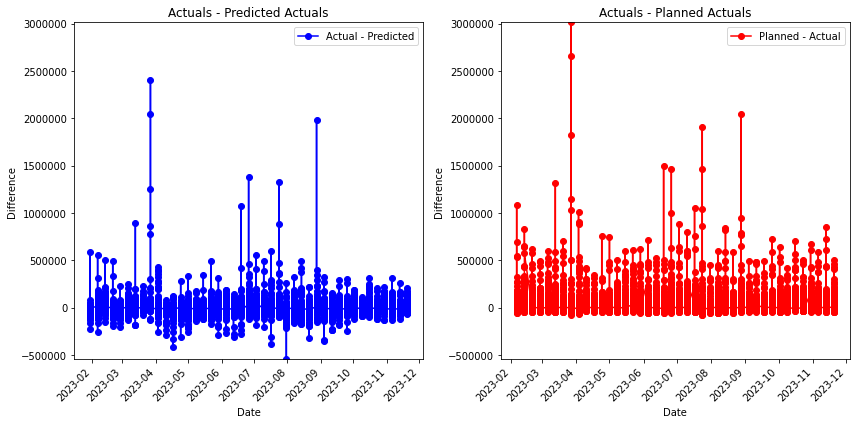

In [64]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
plt.plot(result_df['Date'], result_df['Predicted_Difference'], label='Actual - Predicted', marker='o', color='blue')
plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
plt.plot(selected_rows['Date'], selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd'],
         label='Planned - Actual', marker='o', color='red')
plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.ticklabel_format(axis='y', style='plain')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


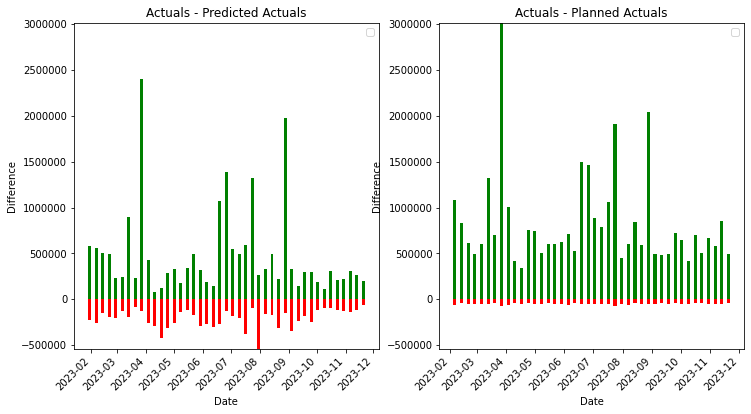

In [65]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
predicted_difference = result_df['Predicted_Difference']

plt.bar(result_df['Date'], predicted_difference, color=np.where(predicted_difference > 0, 'green', 'red'), align='center', width=3.2)

plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
planned_actual_difference = selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']

plt.bar(selected_rows['Date'], planned_actual_difference, color=np.where(planned_actual_difference > 0, 'green', 'red'), align='center', width=3.2)

plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(axis='y', style='plain')

# Replace outliers with average

In [66]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Assuming 'Date' is a datetime column

# Function to replace outliers with the average for each unique date
def replace_outliers_with_average(df, column_name, percentage):
    # Calculate the lower and upper bounds for outliers
    lower_bound = df[column_name].quantile(percentage / 2)
    upper_bound = df[column_name].quantile(1 - percentage / 2)

    # Replace outliers with the average for each date
    df[column_name] = df.groupby('Date')[column_name].apply(
        lambda x: x.clip(lower=x.median() - x.std(), upper=x.median() + x.std())
    )

    return df

# Specify the column and percentage of outliers to replace
column_to_replace_outliers = 'Pln Ship Usd'
outlier_percentage = 0.2  # 10% on each side

# Replace outliers with the average
merged_df_no_outliers = replace_outliers_with_average(merged_df, column_to_replace_outliers, outlier_percentage)

# Check the shape before and after replacing outliers
print(f"Original DataFrame shape: {merged_df.shape}")
print(f"DataFrame shape after replacing outliers: {merged_df_no_outliers.shape}")

# Now you can use merged_df_no_outliers for further analysis or modeling

Original DataFrame shape: (235003, 37)
DataFrame shape after replacing outliers: (235003, 37)


In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Assuming merged_df_no_outliers is defined and contains the necessary columns

# Extract the relevant columns for prediction
# Sort the dataframe by date
merged_df_no_outliers = merged_df_no_outliers.sort_values(by='Date')

# Extract the relevant columns for prediction
selected_columns = ['Pln Ship Usd', 'Pln Base Cs', 'Pln Base Lbs',
                    'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
                    'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units',
                    'Pln Cons Usd', 'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs',
                    'Pln Incr Rtn Usd', 'Pln Incr Ship Cs', 'Pln Incr Ship Kgs',
                    'Pln Incr Ship Lbs', 'Pln Incr Ship Units', 'Pln Incr Ship Usd',
                    'Pln Incr Units', 'Pln Kmf', 'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd',
                    'Pln Ship Cs', 'Pln Ship Ea', 'Pln Ship Kg', 'Pln Ship Lbs',
                    'Value', '1-Month % Change', '3-Month % Change', '12-Month % Change']

# Create feature and target data
X = merged_df_no_outliers[selected_columns].values
y = merged_df_no_outliers['Actl Ship Usd'].values

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
train_X, test_X = X[:train_size, :], X[train_size:, :]
train_y, test_y = y[:train_size], y[train_size:]

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

train_X_scaled = scaler_X.fit_transform(train_X)
train_y_scaled = scaler_y.fit_transform(train_y.reshape(-1, 1))

# Reshape the data for LSTM input shape
train_X_reshaped = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_X_reshaped, train_y_scaled, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
5876/5876 [==============================] - 9s 1ms/step - loss: 0.3204
Epoch 2/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2951
Epoch 3/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2936
Epoch 4/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2847
Epoch 5/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2846
Epoch 6/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2795
Epoch 7/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2792
Epoch 8/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2802
Epoch 9/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2775
Epoch 10/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2725
Epoch 11/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2724
Epoch 12/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2734
E

In [68]:
# Prepare the test data
test_X_scaled = scaler_X.transform(test_X)
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Predict on the test set
predicted_scaled = model.predict(test_X_reshaped)

# Inverse transform the predicted values to the original scale
predicted = scaler_y.inverse_transform(predicted_scaled)

# Create a DataFrame for the results
result_df = pd.DataFrame()
result_df['Date'] = merged_df_no_outliers['Date'][train_size:]

# Populate the result_df DataFrame with predicted values
result_df['Predicted'] = predicted.flatten()
result_df['Actual'] = test_y

# Calculate the differences
result_df['Predicted_Difference'] = result_df['Actual'] - result_df['Predicted']
result_df['Planned_Difference'] =result_df['Actual'] - merged_df_no_outliers['Pln Ship Usd'][train_size:] 

result_df = result_df.sort_values(by='Date')

In [69]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Assuming 'Yr & Wk' is a column representing year and week information

# Extract year and week information from 'Yr & Wk' column
merged_df['Year'] = merged_df['Yr & Wk'].str.split('&').str[0].astype(int)
merged_df['Week'] = merged_df['Yr & Wk'].str.split('&').str[1].astype(int)

# Create a new 'Date' column using the year and week information
merged_df['Date'] = pd.to_datetime(merged_df['Year'].astype(str) + merged_df['Week'].astype(str) + '1', format='%Y%U%w')
merged_df
# Assuming 'merged_df' is your DataFrame
selected_rows = merged_df[merged_df['Date']>='2023-02-06']
# Display the resulting DataFrame
selected_rows

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date,Year,Week
188422,2023&6,18631.998017,227082.24,202306,9466.48,128223.47,355182.33,75731.84,339278.64,128223.47,...,75731.84,58162.05,128223.47,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188423,2023&6,1541.490000,2577.60,202306,28.88,440.10,1036.29,346.58,1240.77,462.49,...,430.58,248.02,546.77,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188424,2023&6,3300.140000,12888.00,202306,128.82,1962.94,5410.40,1545.83,5534.06,2923.21,...,921.83,530.98,1170.57,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188425,2023&6,230.400000,46.08,202306,5.00,76.05,293.40,60.00,230.40,76.05,...,60.00,34.50,76.05,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188426,2023&6,1707.560000,2630.40,202306,73.03,741.91,2883.22,876.36,2401.23,630.82,...,623.20,239.31,527.59,320.569,0.4,1.5,9.5,2023-02-06,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.660000,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
234999,2023&47,13903.180000,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235000,2023&47,15876.000000,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235001,2023&47,19562.433999,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-20,2023,47


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


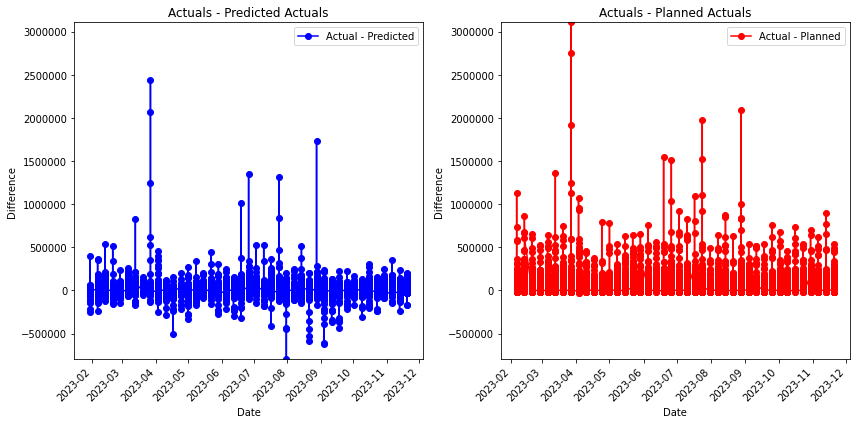

In [70]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
plt.plot(result_df['Date'], result_df['Predicted_Difference'], label='Actual - Predicted', marker='o', color='blue')
plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
plt.plot(selected_rows['Date'], selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd'],
         label='Actual - Planned', marker='o', color='red')
plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.ticklabel_format(axis='y', style='plain')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


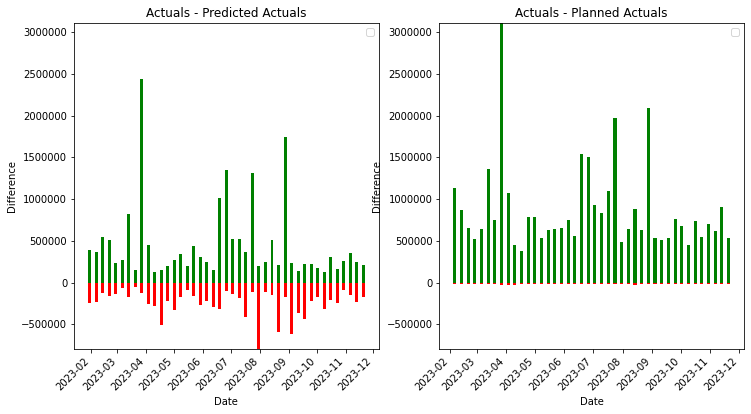

In [71]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
predicted_difference = result_df['Predicted_Difference']

plt.bar(result_df['Date'], predicted_difference, color=np.where(predicted_difference > 0, 'green', 'red'), align='center', width=3.2)

plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
planned_actual_difference = selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']

plt.bar(selected_rows['Date'], planned_actual_difference, color=np.where(planned_actual_difference > 0, 'green', 'red'), align='center', width=3.2)

plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(axis='y', style='plain')

# Replace outliers with neural network

In [72]:
merged_df

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date,Year,Week
0,2020&1,1431.000000,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,636.00,244.23,538.43,261.057,0.5,0.5,1.8,2020-01-06,2020,1
1,2020&1,5941.800000,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,2063.12,1188.36,2619.82,261.057,0.5,0.5,1.8,2020-01-06,2020,1
2,2020&1,970.620000,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,431.39,165.65,365.21,261.057,0.5,0.5,1.8,2020-01-06,2020,1
3,2020&1,1941.110000,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,862.72,331.28,730.36,261.057,0.5,0.5,1.8,2020-01-06,2020,1
4,2020&1,447.100000,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,155.24,89.42,197.13,261.057,0.5,0.5,1.8,2020-01-06,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.660000,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
234999,2023&47,13903.180000,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235000,2023&47,15876.000000,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235001,2023&47,19562.433999,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-20,2023,47


In [73]:
merged_df.columns

Index(['Yr & Wk', 'Pln Ship Usd', 'Actl Ship Usd', 'Cal Wk', 'Pln Base Cs',
       'Pln Base Lbs', 'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
       'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units', 'Pln Cons Usd',
       'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs', 'Pln Incr Rtn Usd',
       'Pln Incr Ship Cs', 'Pln Incr Ship Kgs', 'Pln Incr Ship Lbs',
       'Pln Incr Ship Units', 'Pln Incr Ship Usd', 'Pln Incr Units', 'Pln Kmf',
       'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd', 'Pln Ship Cs', 'Pln Ship Ea',
       'Pln Ship Kg', 'Pln Ship Lbs', 'Value', '1-Month % Change',
       '3-Month % Change', '12-Month % Change', 'Date', 'Year', 'Week'],
      dtype='object')

In [74]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Drop the original 'Yr & Wk' column
# merged_df = merged_df.drop(column_name, axis=1)

def replace_outliers_with_nn(df, target_column, percentage, include_columns=[]):
    # Calculate the lower and upper bounds for outliers
    lower_bound = df[target_column].quantile(percentage / 2)
    upper_bound = df[target_column].quantile(1 - percentage / 2)

    # Filter the DataFrame to include only non-outliers
    df_no_outliers = df[(df[target_column] >= lower_bound) & (df[target_column] <= upper_bound)]

    # Select numeric columns for training the neural network, including specified columns
    columns_to_include = [target_column] + include_columns
    numeric_columns = df_no_outliers[columns_to_include].select_dtypes(include=[np.number]).columns

    # Split the data into features (X) and target variable (y)
    X = df_no_outliers[numeric_columns].drop(target_column, axis=1)
    y = df_no_outliers[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the neural network model
    model = MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)  # You can adjust the architecture as needed
    model.fit(X_train, y_train)

    # Predict the values for outliers
    outliers = df[(df[target_column] < lower_bound) | (df[target_column] > upper_bound)]
    X_outliers = outliers[numeric_columns].drop(target_column, axis=1)
    predicted_values = model.predict(X_outliers)

    # Replace outliers with predicted values
    df.loc[(df[target_column] < lower_bound) | (df[target_column] > upper_bound), target_column] = predicted_values

    return df


# Specify the target column and percentage of outliers to replace
target_column_to_replace_outliers = 'Pln Ship Usd'
outlier_percentage = 0.11  # 10% on each side

# Specify the columns to include in training
include_columns_for_training = ['Pln Base Lbs', 'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
                                'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units', 'Pln Cons Usd']

# Replace outliers with neural network predictions, including specified columns
merged_df_no_outliers = replace_outliers_with_nn(merged_df, target_column_to_replace_outliers, outlier_percentage, include_columns=include_columns_for_training)

# Check the shape before and after replacing outliers
print(f"Original DataFrame shape: {merged_df.shape}")
print(f"DataFrame shape after replacing outliers with NN: {merged_df_no_outliers.shape}")

# Now you can use merged_df_no_outliers_nn for further analysis or modeling

Original DataFrame shape: (235003, 37)
DataFrame shape after replacing outliers with NN: (235003, 37)


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Assuming merged_df_no_outliers is defined and contains the necessary columns

# Extract the relevant columns for prediction
# Sort the dataframe by date
merged_df_no_outliers = merged_df_no_outliers.sort_values(by='Date')

# Extract the relevant columns for prediction
selected_columns = ['Pln Ship Usd', 'Pln Base Cs', 'Pln Base Lbs',
                    'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
                    'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units',
                    'Pln Cons Usd', 'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs',
                    'Pln Incr Rtn Usd', 'Pln Incr Ship Cs', 'Pln Incr Ship Kgs',
                    'Pln Incr Ship Lbs', 'Pln Incr Ship Units', 'Pln Incr Ship Usd',
                    'Pln Incr Units', 'Pln Kmf', 'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd',
                    'Pln Ship Cs', 'Pln Ship Ea', 'Pln Ship Kg', 'Pln Ship Lbs',
                    'Value', '1-Month % Change', '3-Month % Change', '12-Month % Change']

# Create feature and target data
X = merged_df_no_outliers[selected_columns].values
y = merged_df_no_outliers['Actl Ship Usd'].values

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
train_X, test_X = X[:train_size, :], X[train_size:, :]
train_y, test_y = y[:train_size], y[train_size:]

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

train_X_scaled = scaler_X.fit_transform(train_X)
train_y_scaled = scaler_y.fit_transform(train_y.reshape(-1, 1))

# Reshape the data for LSTM input shape
train_X_reshaped = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_X_reshaped, train_y_scaled, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
5876/5876 [==============================] - 9s 1ms/step - loss: 0.3213
Epoch 2/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2969
Epoch 3/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2911
Epoch 4/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2873
Epoch 5/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2834
Epoch 6/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2826
Epoch 7/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2803
Epoch 8/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2788
Epoch 9/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2751
Epoch 10/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2724
Epoch 11/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2700
Epoch 12/50
5876/5876 [==============================] - 7s 1ms/step - loss: 0.2721
E

In [76]:
# Prepare the test data
test_X_scaled = scaler_X.transform(test_X)
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Predict on the test set
predicted_scaled = model.predict(test_X_reshaped)

# Inverse transform the predicted values to the original scale
predicted = scaler_y.inverse_transform(predicted_scaled)

# Create a DataFrame for the results
result_df = pd.DataFrame()
result_df['Date'] = merged_df_no_outliers['Date'][train_size:]

# Populate the result_df DataFrame with predicted values
result_df['Predicted'] = predicted.flatten()
result_df['Actual'] = test_y

# Calculate the differences
result_df['Predicted_Difference'] = result_df['Actual'] - result_df['Predicted']
result_df['Planned_Difference'] = result_df['Actual']-merged_df_no_outliers['Pln Ship Usd'][train_size:]

result_df = result_df.sort_values(by='Date')

In [77]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Assuming 'Yr & Wk' is a column representing year and week information

# Extract year and week information from 'Yr & Wk' column
merged_df['Year'] = merged_df['Yr & Wk'].str.split('&').str[0].astype(int)
merged_df['Week'] = merged_df['Yr & Wk'].str.split('&').str[1].astype(int)

# Create a new 'Date' column using the year and week information
merged_df['Date'] = pd.to_datetime(merged_df['Year'].astype(str) + merged_df['Week'].astype(str) + '1', format='%Y%U%w')
merged_df
# Assuming 'merged_df' is your DataFrame
selected_rows = merged_df[merged_df['Date']>='2023-02-06']
# Display the resulting DataFrame
selected_rows

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date,Year,Week
188422,2023&6,33928.826109,227082.24,202306,9466.48,128223.47,355182.33,75731.84,339278.64,128223.47,...,75731.84,58162.05,128223.47,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188423,2023&6,1541.490000,2577.60,202306,28.88,440.10,1036.29,346.58,1240.77,462.49,...,430.58,248.02,546.77,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188424,2023&6,3300.140000,12888.00,202306,128.82,1962.94,5410.40,1545.83,5534.06,2923.21,...,921.83,530.98,1170.57,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188425,2023&6,230.400000,46.08,202306,5.00,76.05,293.40,60.00,230.40,76.05,...,60.00,34.50,76.05,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188426,2023&6,1707.560000,2630.40,202306,73.03,741.91,2883.22,876.36,2401.23,630.82,...,623.20,239.31,527.59,320.569,0.4,1.5,9.5,2023-02-06,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.660000,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
234999,2023&47,13903.180000,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235000,2023&47,15876.000000,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235001,2023&47,3737.975594,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-20,2023,47


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


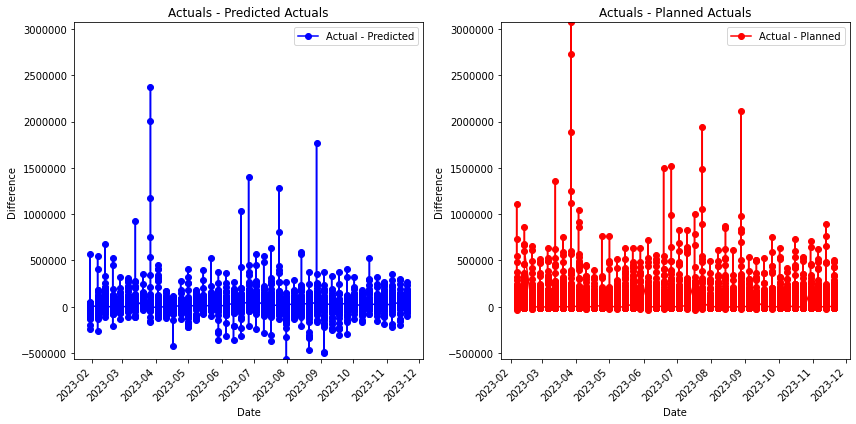

In [78]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
plt.plot(result_df['Date'], result_df['Predicted_Difference'], label='Actual - Predicted', marker='o', color='blue')
plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
plt.plot(selected_rows['Date'], selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd'],
         label='Actual - Planned', marker='o', color='red')
plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.ticklabel_format(axis='y', style='plain')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


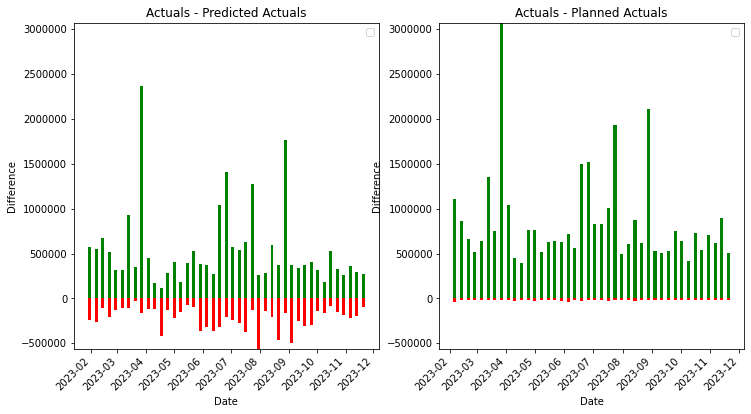

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
predicted_difference = result_df['Predicted_Difference']

plt.bar(result_df['Date'], predicted_difference, 
        color=np.where(predicted_difference > 0, 'green', 'red'), 
        align='center', width=3.2)  # Updated parameters

plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
planned_actual_difference = selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']

plt.bar(selected_rows['Date'], planned_actual_difference, 
        color=np.where(planned_actual_difference > 0, 'green', 'red'), 
        align='center', width=3.2)  # Updated parameters

plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(axis='y', style='plain')

plt.show()

# Next Idea: Most Well-rounded Model should probably remove outliers when training but still predict on them later on to have even comparison between Planned and Predicted Actuals

In [80]:
import pandas as pd
# Function to remove outliers for each unique date
def remove_outliers(df, column_name, percentage):
    # Group by date and apply the removal of outliers
    df_no_outliers = df.groupby('Date').apply(
        lambda x: x[
            (x[column_name] >= x[column_name].quantile(percentage / 2)) &
            (x[column_name] <= x[column_name].quantile(1 - percentage / 2))
        ]
    ).reset_index(drop=True)
    return df_no_outliers

# Specify the column and percentage of outliers to remove
column_to_remove_outliers = 'Pln Ship Usd'
outlier_percentage = 0.2  # 10% on each side

# Remove outliers
merged_df_no_outliers = remove_outliers(merged_df, column_to_remove_outliers, outlier_percentage)

# Check the shape before and after removing outliers
print(f"Original DataFrame shape: {merged_df.shape}")
print(f"DataFrame shape after removing outliers: {merged_df_no_outliers.shape}")

# Now you can use merged_df_no_outliers for further analysis or modeling

Original DataFrame shape: (235003, 37)
DataFrame shape after removing outliers: (201775, 37)


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Assuming merged_df_no_outliers is defined and contains the necessary columns

# Extract the relevant columns for prediction
# Sort the dataframe by date
merged_df_no_outliers = merged_df_no_outliers.sort_values(by='Date')

# Extract the relevant columns for prediction
selected_columns = ['Pln Ship Usd', 'Pln Base Cs', 'Pln Base Lbs',
                    'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
                    'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units',
                    'Pln Cons Usd', 'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs',
                    'Pln Incr Rtn Usd', 'Pln Incr Ship Cs', 'Pln Incr Ship Kgs',
                    'Pln Incr Ship Lbs', 'Pln Incr Ship Units', 'Pln Incr Ship Usd',
                    'Pln Incr Units', 'Pln Kmf', 'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd',
                    'Pln Ship Cs', 'Pln Ship Ea', 'Pln Ship Kg', 'Pln Ship Lbs',
                    'Value', '1-Month % Change', '3-Month % Change', '12-Month % Change']

# Create feature and target data
X = merged_df_no_outliers[selected_columns].values
y = merged_df_no_outliers['Actl Ship Usd'].values

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
train_X, test_X = X[:train_size, :], X[train_size:, :]
train_y, test_y = y[:train_size], y[train_size:]

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

train_X_scaled = scaler_X.fit_transform(train_X)
train_y_scaled = scaler_y.fit_transform(train_y.reshape(-1, 1))

# Reshape the data for LSTM input shape
train_X_reshaped = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_X_reshaped, train_y_scaled, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
5045/5045 [==============================] - 8s 1ms/step - loss: 0.3240
Epoch 2/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2911
Epoch 3/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2883
Epoch 4/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2795
Epoch 5/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2740
Epoch 6/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2751
Epoch 7/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2686
Epoch 8/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2613
Epoch 9/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2665
Epoch 10/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2640
Epoch 11/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2641
Epoch 12/50
5045/5045 [==============================] - 6s 1ms/step - loss: 0.2621
E

In [82]:
# Prepare the test data
test_X_scaled = scaler_X.transform(test_X)
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Predict on the test set
predicted_scaled = model.predict(test_X_reshaped)

# Inverse transform the predicted values to the original scale
predicted = scaler_y.inverse_transform(predicted_scaled)

# Create a DataFrame for the results
result_df = pd.DataFrame()
result_df['Date'] = merged_df_no_outliers['Date'][train_size:]

# Populate the result_df DataFrame with predicted values
result_df['Predicted'] = predicted.flatten()
result_df['Actual'] = test_y
result_df['Planned'] merged_df_no_outliers['Pln Ship Usd'][train_size:]

# Calculate the differences
result_df['Predicted_Difference'] = result_df['Actual'] - result_df['Predicted']
result_df['Planned_Difference'] = result_df['Actual']-result_df['Planned']

result_df = result_df.sort_values(by='Date')

In [83]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Assuming 'Yr & Wk' is a column representing year and week information

# Extract year and week information from 'Yr & Wk' column
merged_df['Year'] = merged_df['Yr & Wk'].str.split('&').str[0].astype(int)
merged_df['Week'] = merged_df['Yr & Wk'].str.split('&').str[1].astype(int)

# Create a new 'Date' column using the year and week information
merged_df['Date'] = pd.to_datetime(merged_df['Year'].astype(str) + merged_df['Week'].astype(str) + '1', format='%Y%U%w')
merged_df
# Assuming 'merged_df' is your DataFrame
selected_rows = merged_df[merged_df['Date']>='2023-02-06']
# Display the resulting DataFrame
selected_rows

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date,Year,Week
188422,2023&6,33928.826109,227082.24,202306,9466.48,128223.47,355182.33,75731.84,339278.64,128223.47,...,75731.84,58162.05,128223.47,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188423,2023&6,1541.490000,2577.60,202306,28.88,440.10,1036.29,346.58,1240.77,462.49,...,430.58,248.02,546.77,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188424,2023&6,3300.140000,12888.00,202306,128.82,1962.94,5410.40,1545.83,5534.06,2923.21,...,921.83,530.98,1170.57,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188425,2023&6,230.400000,46.08,202306,5.00,76.05,293.40,60.00,230.40,76.05,...,60.00,34.50,76.05,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188426,2023&6,1707.560000,2630.40,202306,73.03,741.91,2883.22,876.36,2401.23,630.82,...,623.20,239.31,527.59,320.569,0.4,1.5,9.5,2023-02-06,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.660000,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
234999,2023&47,13903.180000,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235000,2023&47,15876.000000,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235001,2023&47,3737.975594,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-20,2023,47


No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


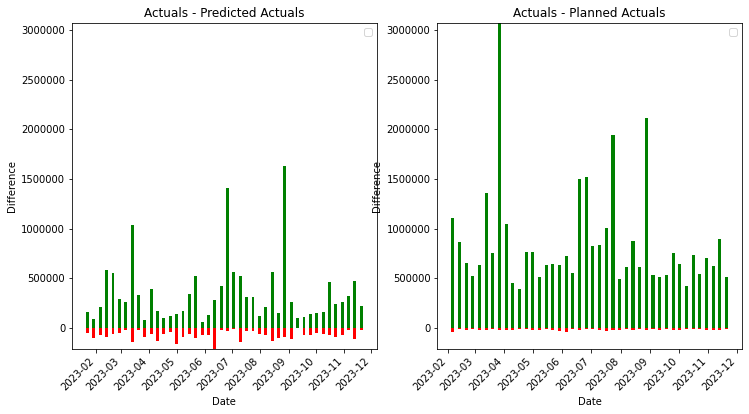

In [84]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(13, 7))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
predicted_difference = result_df['Predicted_Difference']

plt.bar(result_df['Date'], predicted_difference, color=np.where(predicted_difference > 0, 'green', 'red'), align='center', width=3.2)

plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
planned_actual_difference = selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']

plt.bar(selected_rows['Date'], planned_actual_difference, color=np.where(planned_actual_difference > 0, 'green', 'red'), align='center', width=3.2)

plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(axis='y', style='plain')

# With cross-validation

Epoch 1/50
1051/1051 [==============================] - 3s 1ms/step - loss: 0.4184
Epoch 2/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.3412
Epoch 3/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.3296
Epoch 4/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.3108
Epoch 5/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.3148
Epoch 6/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.2985
Epoch 7/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.2963
Epoch 8/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.2918
Epoch 9/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.2853
Epoch 10/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.2808
Epoch 11/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.2852
Epoch 12/50
1051/1051 [==============================] - 1s 1ms/step - loss: 0.2731
E

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


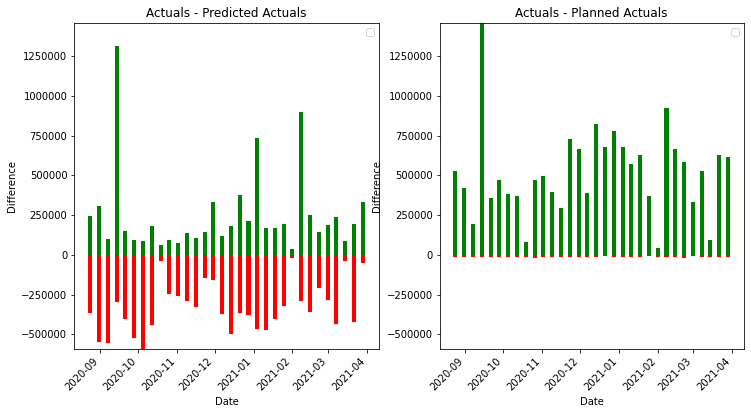

Epoch 1/50
2102/2102 [==============================] - 4s 1ms/step - loss: 0.3822
Epoch 2/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.3258
Epoch 3/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.3079
Epoch 4/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.3018
Epoch 5/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.3093
Epoch 6/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.2961
Epoch 7/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.2912
Epoch 8/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.2887
Epoch 9/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.2826
Epoch 10/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.2804
Epoch 11/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.2818
Epoch 12/50
2102/2102 [==============================] - 3s 1ms/step - loss: 0.2745
E

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


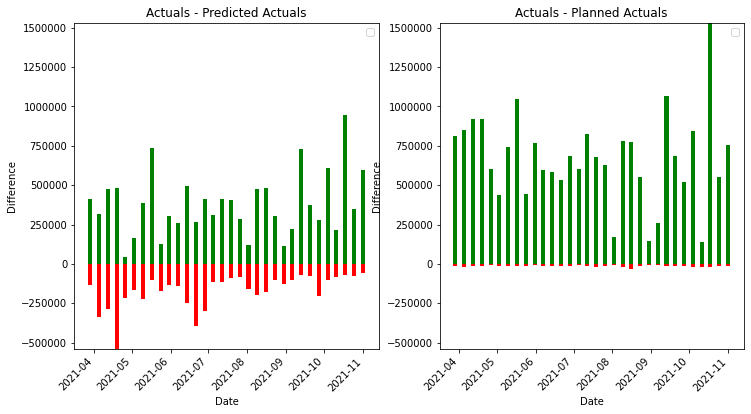

Epoch 1/50
3153/3153 [==============================] - 5s 1ms/step - loss: 0.3473
Epoch 2/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2996
Epoch 3/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2912
Epoch 4/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2844
Epoch 5/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2836
Epoch 6/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2768
Epoch 7/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2752
Epoch 8/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2818
Epoch 9/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2785
Epoch 10/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2736
Epoch 11/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2707
Epoch 12/50
3153/3153 [==============================] - 4s 1ms/step - loss: 0.2736
E

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


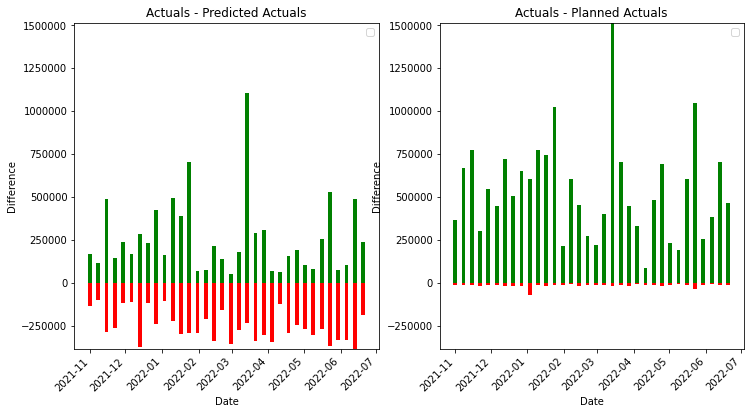

Epoch 1/50
4204/4204 [==============================] - 6s 1ms/step - loss: 0.3177
Epoch 2/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2904
Epoch 3/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2857
Epoch 4/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2816
Epoch 5/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2754
Epoch 6/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2737
Epoch 7/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2795
Epoch 8/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2682
Epoch 9/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2690
Epoch 10/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2632
Epoch 11/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2696
Epoch 12/50
4204/4204 [==============================] - 5s 1ms/step - loss: 0.2655
E

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


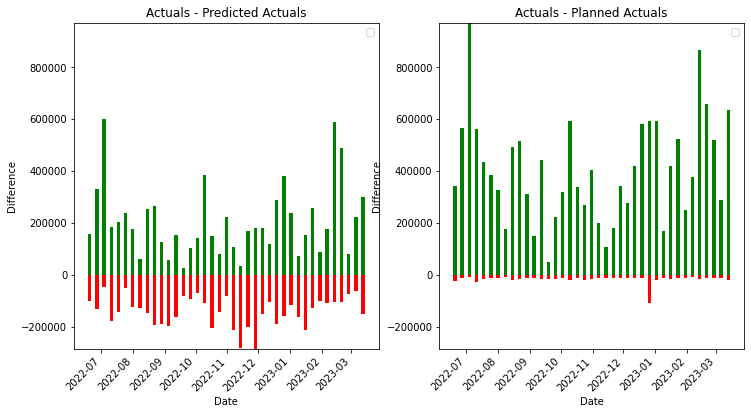

Epoch 1/50
5255/5255 [==============================] - 8s 1ms/step - loss: 0.3194
Epoch 2/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2873
Epoch 3/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2838
Epoch 4/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2791
Epoch 5/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2780
Epoch 6/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2756
Epoch 7/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2680
Epoch 8/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2699
Epoch 9/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2657
Epoch 10/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2660
Epoch 11/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2655
Epoch 12/50
5255/5255 [==============================] - 6s 1ms/step - loss: 0.2608
E

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


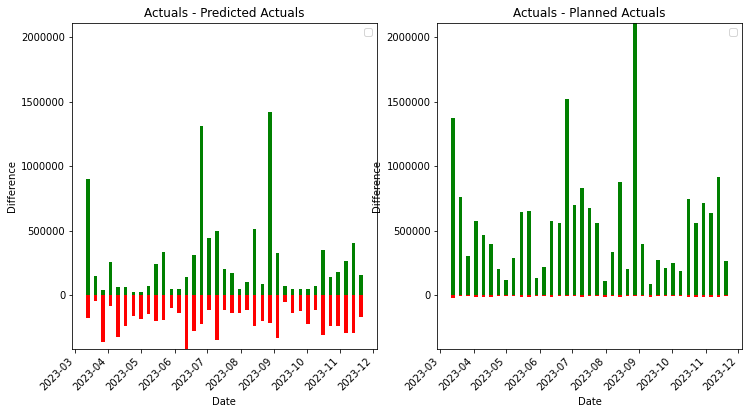

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Function to remove outliers for each unique date
def remove_outliers(df, column_name, percentage):
    df_no_outliers = df.groupby('Date').apply(
        lambda x: x[
            (x[column_name] >= x[column_name].quantile(percentage / 2)) &
            (x[column_name] <= x[column_name].quantile(1 - percentage / 2))
        ]
    ).reset_index(drop=True)
    return df_no_outliers

# Specify the column and percentage of outliers to remove
column_to_remove_outliers = 'Pln Ship Usd'
outlier_percentage = 0.2  # 10% on each side

# Remove outliers
merged_df_no_outliers = remove_outliers(merged_df, column_to_remove_outliers, outlier_percentage)
merged_df_no_outliers = merged_df_no_outliers.sort_values(by='Date')

# Extract the relevant columns for prediction
selected_columns = ['Pln Ship Usd', 'Pln Base Cs', 'Pln Base Lbs',
                    'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
                    'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units',
                    'Pln Cons Usd', 'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs',
                    'Pln Incr Rtn Usd', 'Pln Incr Ship Cs', 'Pln Incr Ship Kgs',
                    'Pln Incr Ship Lbs', 'Pln Incr Ship Units', 'Pln Incr Ship Usd',
                    'Pln Incr Units', 'Pln Kmf', 'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd',
                    'Pln Ship Cs', 'Pln Ship Ea', 'Pln Ship Kg', 'Pln Ship Lbs',
                    'Value', '1-Month % Change', '3-Month % Change', '12-Month % Change']

# Create feature and target data
X = merged_df_no_outliers[selected_columns].values
y = merged_df_no_outliers['Actl Ship Usd'].values

# Cross-validation using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    train_X, test_X = X[train_index], X[test_index]
    train_y, test_y = y[train_index], y[test_index]

    # Standardize the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    train_X_scaled = scaler_X.fit_transform(train_X)
    train_y_scaled = scaler_y.fit_transform(train_y.reshape(-1, 1))

    # Reshape the data for LSTM input shape
    train_X_reshaped = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(train_X_reshaped, train_y_scaled, epochs=50, batch_size=32, verbose=1)

    # Prepare the test data
    test_X_scaled = scaler_X.transform(test_X)
    test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

    # Predict on the test set
    predicted_scaled = model.predict(test_X_reshaped)

    # Inverse transform the predicted values to the original scale
    predicted = scaler_y.inverse_transform(predicted_scaled)

    # Create a DataFrame for the results
    result_df = pd.DataFrame()
    result_df['Date'] = merged_df_no_outliers['Date'][test_index]

    # Populate the result_df DataFrame with predicted values
    result_df['Predicted'] = predicted.flatten()
    result_df['Actual'] = test_y
    result_df['Planned'] merged_df_no_outliers['Pln Ship Usd'][train_size:]

    # Calculate the differences
    result_df['Predicted_Difference'] = result_df['Actual'] - result_df['Predicted']
    result_df['Planned_Difference'] = result_df['Actual'] - result_df['Planned']

    result_df = result_df.sort_values(by='Date')


    # Plot the differences
    plt.figure(figsize=(12, 6))

    # Plot for Predicted Actuals - Actuals
    plt.subplot(1, 2, 1)
    predicted_difference = result_df['Predicted_Difference']

    plt.bar(result_df['Date'], predicted_difference, color=np.where(predicted_difference > 0, 'green', 'red'), align='center', width=3.2)

    plt.title('Actuals - Predicted Actuals')
    plt.xlabel('Date')
    plt.ylabel('Difference')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.ticklabel_format(axis='y', style='plain')

    # Plot for Planned Actuals - Actuals
    plt.subplot(1, 2, 2)
    planned_actual_difference = selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']

    plt.bar(selected_rows['Date'], planned_actual_difference, color=np.where(planned_actual_difference > 0, 'green', 'red'), align='center', width=3.2)

    plt.title('Actuals - Planned Actuals')
    plt.xlabel('Date')
    plt.ylabel('Difference')
    plt.legend()

    # Set y-axis limits to be the same for both subplots
    min_y = min(result_df['Predicted_Difference'].min(),
                (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
    max_y = max(result_df['Predicted_Difference'].max(),
                (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

    plt.subplot(1, 2, 1)
    plt.ylim(min_y, max_y)

    plt.subplot(1, 2, 2)
    plt.ylim(min_y, max_y)

    # Adjust y-axis formatting to show full numbers
    plt.xticks(rotation=45, ha='right')
    plt.ticklabel_format(axis='y', style='plain')

# Other economic data: https://data-explorer.oecd.org/vis?fs[0]=Topic%2C1%7CEconomy%23ECO%23%7CPrices%23ECO_PRI%23&pg=0&fc=Topic&bp=true&snb=16&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_PRICES%40DF_PRICES_ALL&df[ag]=OECD.SDD.TPS&df[vs]=1.0&pd=2000-01%2C2024-03&dq=USA.M.N.CPI.PA.CP041T043%2BCP01%2B_T.N.GY&ly[cl]=TIME_PERIOD&to[TIME_PERIOD]=false&vw=tb

In [11]:
import pandas as pd

OECD=pd.read_csv("OECD.csv")
OECD[['Expenditure','OBS_VALUE']]

,Expenditure,OBS_VALUE
0,Total,2.738892
1,Total,3.221884
2,Total,3.757576
3,Total,3.068592
4,Total,3.188929
...,...,...
861,Housing,7.459844
862,Housing,7.192297
863,Housing,6.956841
864,Housing,6.756000


In [4]:
import pandas as pd

# Assuming you already have a DataFrame named 'df'
# If not, you can create it using pd.read_csv or another method

# Replace 'YourColumnName' with the actual column name you are interested in
column_name = 'Expenditure'

# Print unique values in the specified column
unique_values = OECD[column_name].unique()
print("Unique values in column '{}':".format(column_name))
print(unique_values)


Unique values in column 'Expenditure':
['Total' 'Food and non-alcoholic beverages' 'Housing']


In [7]:
OECD.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'FREQ', 'Frequency of observation', 'METHODOLOGY',
       'Methodology', 'MEASURE', 'Measure', 'UNIT_MEASURE', 'Unit of measure',
       'EXPENDITURE', 'Expenditure', 'ADJUSTMENT', 'Adjustment',
       'TRANSFORMATION', 'Transformation', 'TIME_PERIOD', 'Time period',
       'OBS_VALUE', 'Observation value', 'OBS_STATUS', 'Observation status',
       'UNIT_MULT', 'Unit multiplier', 'BASE_PER', 'Base period', 'DURABILITY',
       'Durability', 'DECIMALS', 'Decimals'],
      dtype='object')

In [10]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# If not, you can replace 'df' with the actual name of your DataFrame

# Replace 'Expenditure' with the actual column name you are interested in
column_name = 'Expenditure'

# Create a new DataFrame with the unique values in the 'Expenditure' column as columns
pivot_df = pd.pivot_table(OECD, values='OBS_VALUE', index=['REF_AREA', 'TIME_PERIOD'], columns=column_name, aggfunc='sum', fill_value=0)

# Reset the index to flatten the DataFrame
pivot_df.reset_index(inplace=True)

# Print the modified DataFrame
pivot_df

Expenditure,REF_AREA,TIME_PERIOD,Food and non-alcoholic beverages,Housing,Total
0,USA,2000-01,1.217285,2.964118,2.738892
1,USA,2000-02,1.526252,3.003625,3.221884
2,USA,2000-03,1.835985,3.197525,3.757576
3,USA,2000-04,1.834862,3.036541,3.068592
4,USA,2000-05,2.196461,3.141092,3.188929
...,...,...,...,...,...
284,USA,2023-09,2.376901,7.192297,3.699698
285,USA,2023-10,2.048327,6.956841,3.241145
286,USA,2023-11,1.603511,6.756000,3.137271
287,USA,2023-12,1.165851,6.394543,3.352123
